# Install Dependecies

In [1]:
pip install scikit-learn pandas transformers torch indic-transliteration tf-keras spacy sentencepiece tqdm sacremoses nltk

  Using cached transformers-4.52.4-py3-none-any.whl.metadata (38 kB)
  Using cached indic_transliteration-2.3.69-py3-none-any.whl.metadata (1.4 kB)
  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached sentencepiece-0.2.0.tar.gz (2.6 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached sacremoses-0.1.1-py3-none-any.whl.metadata (8.3 kB)
  Using cached huggingface_hub-0.33.0-py3-none-any.whl.metadata (14 kB)
  Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm64.whl.metadata (3.8 kB)
  Using cached backports.functools_lru_cache-2.0.0-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached roman-5.0-py3-none-any.whl.metadata (3.7 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
  Using cached tf_keras-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tf

In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 32.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 29.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


# Import Packages

In [1]:
import pandas as pd
import numpy as np
import re
import cv2
import nltk
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import gensim.downloader as api


# Load Dataset

In [2]:
df = pd.read_csv('cuisine.csv')
df

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions,image_available
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,https://www.archanaskitchen.com/images/archana...,Doddapatre Tambuli Recipe is a popular healing...,Indian,Side Dish,Vegetarian,Total in 30 M,\n\n\t\t\t\t\t\t\t \t\t4 cups Indian borage (D...,"To begin making the Doddapatre Tambuli, first ...",1
1,Fish Tandoori Recipe,https://www.archanaskitchen.com/images/archana...,Have you ever tried out fish tandoori? Trust m...,North Indian Recipes,Appetizer,High Protein Non Vegetarian,Total in 80 M,\n\n\t\t\t\t\t\t\t \t\t1 Fish\t\t\t\t\t\t\t \t...,"To begin making the Fish Tandoori recipe, keep...",1
2,Arbi Shimla Mirch Sabzi Recipe – Colocasia Cap...,https://www.archanaskitchen.com/images/archana...,Arbi Shimla Mirch Sabzi Recipe is a variation ...,North Indian Recipes,Main Course,No Onion No Garlic (Sattvic),Total in 55 M,\n\n\t\t\t\t\t\t\t \t\t300 grams Colocasia roo...,To begin making the Arbi Shimla Mirch Sabzi Re...,1
3,Ambur Style Brinjal Curry Recipe,https://www.archanaskitchen.com/images/archana...,Brinjal Curry is prepared in different ways in...,Indian,Lunch,Vegetarian,Total in 20 M,\n\n\t\t\t\t\t\t\t \t\t5 Brinjal (Baingan / Eg...,To begin making the Ambur Style Brinjal Curry ...,1
4,Mavinakayi Menasinakai Curry Recipe - Raw Man...,https://www.archanaskitchen.com/images/archana...,Mangalorean Mavinakayi Menasinakai Curry Recip...,Mangalorean,Side Dish,Vegetarian,Total in 35 M,\n\n\t\t\t\t\t\t\t \t\t1 cup Mango (Raw)\t\t\t...,To begin making Mangalorean Mavinakayi Menasin...,1
...,...,...,...,...,...,...,...,...,...,...
4461,Tamil Nadu Style Vazha Thandu Thogayal Recipe ...,https://www.archanaskitchen.com/images/archana...,Tamil Nadu Style Vazha Thandu Thogayal Recipe ...,Tamil Nadu,Side Dish,Vegetarian,Total in 40 M,\n\n\t\t\t\t\t\t\t \t\t1 teaspoon Mustard seed...,We begin making the Tamil Nadu Style Vazha Tha...,1
4462,Kondakadalai Vazhathandu Puli Thengai Kuzhambu...,https://www.archanaskitchen.com/images/archana...,Kondakadalai Vazhathandu Puli Thengai Kuzhambu...,Tamil Nadu,Main Course,Diabetic Friendly,Total in 530 M,\n\n\t\t\t\t\t\t\t \t\t1 cup Kala Chana (Brown...,We begin making the Kondakadalai Vazhathandu P...,1
4463,Besan & Atta Ki Roti Recipe (Chickpea Flatbread),https://www.archanaskitchen.com/images/archana...,The Besan & Atta Ki Roti Recipe is a delicious...,Indian,Dinner,Vegetarian,Total in 40 M,\n\n\t\t\t\t\t\t\t \t\t2 cups Gram flour (besa...,To begin making the Besan & Atta Ki Roti Recip...,1
4464,Cauliflower And Methi Paratha Recipe,https://www.archanaskitchen.com/images/archana...,Cauliflower And Methi Paratha is a perfect bre...,Indian,Indian Breakfast,Vegetarian,Total in 60 M,\nFor the dough\n\n\t\t\t\t\t\t\t \t\t1 cup Wh...,To begin with Cauliflower And Methi Paratha Re...,1


# Clean the format of display of Ingredients

In [3]:
def clean_ingredients(text):
    if not isinstance(text, str):
        return text
    # Replace \n and \t with commas
    text = re.sub(r'[\n\t]+', ',', text)
    # Remove all characters except letters and commas
    text = re.sub(r'[^a-zA-Z,\s]', '', text)
    # Collapse multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove leading/trailing whitespace around each item
    parts = [part.strip() for part in text.split(',')]
    # Remove empty strings
    parts = [part for part in parts if part]
    return ', '.join(parts)

# Apply cleaning
df['cleaned_ingredients'] = df['ingredients'].apply(clean_ingredients)

# Preview result
print(df[['ingredients', 'cleaned_ingredients']].head())

                                         ingredients  \
0  \n\n\t\t\t\t\t\t\t \t\t4 cups Indian borage (D...   
1  \n\n\t\t\t\t\t\t\t \t\t1 Fish\t\t\t\t\t\t\t \t...   
2  \n\n\t\t\t\t\t\t\t \t\t300 grams Colocasia roo...   
3  \n\n\t\t\t\t\t\t\t \t\t5 Brinjal (Baingan / Eg...   
4  \n\n\t\t\t\t\t\t\t \t\t1 cup Mango (Raw)\t\t\t...   

                                 cleaned_ingredients  
0  cups Indian borage Doddapatre, cleaned and was...  
1  Fish, nicely washed with bones on I used Pompa...  
2  grams Colocasia root Arbi, Green Bell Pepper C...  
3  Brinjal Baingan Eggplant, Onion, Tomatoes, tab...  
4  cup Mango Raw, diced, tablespoons Jaggery, tea...  


In [4]:
# Split comma-separated ingredient strings and flatten into one list
all_ingredients = df['cleaned_ingredients'].dropna().apply(lambda x: [ing.strip() for ing in x.split(',')])

# Flatten the list of lists
flat_ingredients = [item for sublist in all_ingredients for item in sublist]

# Get unique and sort
unique_ingredients = sorted(set(flat_ingredients))

# Display
print(f"Total Unique Ingredients: {len(unique_ingredients)}")
for i, ingr in enumerate(unique_ingredients, 1):
    print(f"{i}. {ingr}")

Total Unique Ingredients: 10225
1. 
2. A few
3. A few strands soaked in a teaspoon of milk
4. A generous pinch
5. A generous pinch optional
6. A handful
7. A handful chopped
8. A pinch
9. A pinch of turmeric
10. A pinch optional
11. A small bunch
12. A small piece
13. A sprig of curry leaves
14. Aam Papad Sun Dried Mango
15. Aar Maach fish
16. Aarle cup chlorofes chlorin
17. Ablamla inches cm short carat powder salt
18. About grams about grams
19. About grams per ounce
20. Absorbial little rummy piece of cheese to ths oil hucks to early dawn for th
21. Achari Masala
22. Add more if you like it spicier
23. Additional Ingredients Optional
24. Adjust to suit your spice levels
25. Ajwain Carom seeds
26. Akk box of corn
27. All Purpose Flour Maida
28. Allpurpose flour for dusting
29. AlmaNellikai grated
30. Almond Milk Badam Milk
31. Almond butter
32. Almonds
33. Alternative Ingredients You can use the following ingredients in addition to the potatoes
34. Alu bukhara
35. Amarine roses
36. A

# Apply Lemmatization on Cleaned Ingredients

In [6]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download required resource
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to each word in the cleaned_ingredients
def lemmatize_ingredients(ingredient_str):
    ingredients = ingredient_str.split(',')  # split by commas
    lemmatized = [lemmatizer.lemmatize(word.strip()) for word in ingredients if word.strip()]
    return ', '.join(lemmatized)

# Apply to DataFrame
df['cleaned_ingredients'] = df['cleaned_ingredients'].dropna().apply(lemmatize_ingredients)

# Optional: View sample result
print(df['cleaned_ingredients'].head())


0    cups Indian borage Doddapatre, cleaned and was...
1    Fish, nicely washed with bones on I used Pompa...
2    grams Colocasia root Arbi, Green Bell Pepper C...
3    Brinjal Baingan Eggplant, Onion, Tomatoes, tab...
4    cup Mango Raw, diced, tablespoons Jaggery, tea...
Name: cleaned_ingredients, dtype: object


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dhrubieee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/dhrubieee/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Display ingredients again

In [7]:
# Split comma-separated ingredient strings and flatten into one list
all_ingredients = df['cleaned_ingredients'].dropna().apply(lambda x: [ing.strip() for ing in x.split(',')])

# Flatten the list of lists
flat_ingredients = [item for sublist in all_ingredients for item in sublist]

# Get unique and sort
unique_ingredients = sorted(set(flat_ingredients))

# Display
print(f"Total Unique Ingredients: {len(unique_ingredients)}")
for i, ingr in enumerate(unique_ingredients, 1):
    print(f"{i}. {ingr}")

Total Unique Ingredients: 10191
1. 
2. A few
3. A few strands soaked in a teaspoon of milk
4. A generous pinch
5. A generous pinch optional
6. A handful
7. A handful chopped
8. A pinch
9. A pinch of turmeric
10. A pinch optional
11. A small bunch
12. A small piece
13. A sprig of curry leaves
14. Aam Papad Sun Dried Mango
15. Aar Maach fish
16. Aarle cup chlorofes chlorin
17. Ablamla inches cm short carat powder salt
18. About grams about grams
19. About grams per ounce
20. Absorbial little rummy piece of cheese to ths oil hucks to early dawn for th
21. Achari Masala
22. Add more if you like it spicier
23. Additional Ingredients Optional
24. Adjust to suit your spice levels
25. Ajwain Carom seeds
26. Akk box of corn
27. All Purpose Flour Maida
28. Allpurpose flour for dusting
29. AlmaNellikai grated
30. Almond Milk Badam Milk
31. Almond butter
32. Almonds
33. Alternative Ingredients You can use the following ingredients in addition to the potatoes
34. Alu bukhara
35. Amarine roses
36. A

# Split the ingredients into unique tokens

In [8]:
# Tokenize and normalize (lowercase)
tokens = []
for entry in unique_ingredients:
    entry = entry.lower()
    tokens += re.findall(r'\b\w+\b', entry)

# Count frequency
token_counts = Counter(tokens)
token_list1 = []
# Display frequencies sorted by count descending
for token, freq in token_counts.most_common():
    token_list1.append(token)
    print(f"{token}: {freq}")

for: 1349
cup: 1163
the: 1028
cut: 966
of: 962
to: 936
big: 781
and: 682
cups: 547
a: 537
or: 530
in: 486
cuts: 481
grams: 453
green: 438
small: 428
oil: 368
ml: 355
powder: 354
into: 348
ingredients: 299
cm: 292
plus: 291
water: 287
chopped: 281
glacier: 279
inches: 273
tablespoon: 261
p: 256
teaspoon: 244
masala: 244
tablespoons: 234
salt: 230
glaciers: 219
inch: 219
little: 214
claws: 210
red: 205
rice: 199
seeds: 189
as: 172
paste: 166
oclock: 165
pic: 163
fine: 161
leaves: 157
pm: 149
short: 147
flour: 147
claw: 147
coconut: 147
down: 140
th: 137
dal: 137
soaked: 133
it: 128
peeled: 128
with: 124
milk: 121
one: 120
taste: 119
glacial: 117
teaspoons: 116
pieces: 114
cheese: 107
garlic: 104
black: 104
finely: 103
card: 101
sugar: 99
carat: 98
ground: 96
required: 96
whole: 93
dry: 91
garnish: 88
acid: 88
carats: 85
hot: 85
out: 85
sliced: 84
according: 83
diameter: 83
chilli: 81
cream: 81
coconuts: 80
make: 78
grated: 77
roasted: 77
smaller: 77
off: 77
beans: 76
white: 75
fresh: 74


In [10]:
len(token_list1)

3990

In [11]:
token_list1

['for',
 'cup',
 'the',
 'cut',
 'of',
 'to',
 'big',
 'and',
 'cups',
 'a',
 'or',
 'in',
 'cuts',
 'grams',
 'green',
 'small',
 'oil',
 'ml',
 'powder',
 'into',
 'ingredients',
 'cm',
 'plus',
 'water',
 'chopped',
 'glacier',
 'inches',
 'tablespoon',
 'p',
 'teaspoon',
 'masala',
 'tablespoons',
 'salt',
 'glaciers',
 'inch',
 'little',
 'claws',
 'red',
 'rice',
 'seeds',
 'as',
 'paste',
 'oclock',
 'pic',
 'fine',
 'leaves',
 'pm',
 'short',
 'flour',
 'claw',
 'coconut',
 'down',
 'th',
 'dal',
 'soaked',
 'it',
 'peeled',
 'with',
 'milk',
 'one',
 'taste',
 'glacial',
 'teaspoons',
 'pieces',
 'cheese',
 'garlic',
 'black',
 'finely',
 'card',
 'sugar',
 'carat',
 'ground',
 'required',
 'whole',
 'dry',
 'garnish',
 'acid',
 'carats',
 'hot',
 'out',
 'sliced',
 'according',
 'diameter',
 'chilli',
 'cream',
 'coconuts',
 'make',
 'grated',
 'roasted',
 'smaller',
 'off',
 'beans',
 'white',
 'fresh',
 'm',
 'gram',
 'few',
 'be',
 'optional',
 'half',
 'cooking',
 'kg',
 

In [12]:
# Assuming token_list1 is already defined as a list of strings
sorted_tokens = sorted(token_list1)

# Display each token
for token in sorted_tokens:
    print(token)

a
aa
aachi
aam
aamras
aar
aarable
aarle
aarly
aasak
aava
ablamla
about
absorbial
access
accommodations
according
accordingly
achaari
achar
achari
acid
acids
active
ada
adai
add
added
adder
adding
addition
additional
adds
adjus
adjust
adjustable
adjusted
aerated
after
afza
agar
agathi
aharan
ajwain
akak
akhrot
akia
akk
akkak
aklelex
al
albuckbuck
alkam
alkamic
alkanet
alkong
all
allpurpose
almanable
almanellikai
almed
almedh
almond
almonds
almondscashews
almost
almothers
aloe
along
aloo
also
alternative
alu
alum
alumin
aluminant
aluminate
alumine
aluminine
alumins
aluminum
amar
amarable
amaran
amarank
amaranth
amaranton
amarin
amarine
amarinus
amarion
amark
amarkachari
amarlah
ambade
amboli
ambromy
ambromygram
ambula
amchur
amicable
amicide
amla
amorous
amount
ampple
amputation
amritsar
amritsari
amsul
amtekai
amti
amul
an
anaque
anardana
anchus
and
angles
angular
animum
anise
aniss
ansi
ant
anthrill
any
apologizing
appe
appear
apple
applebones
apples
appropriate
approx
approximately
ap

In [13]:
df

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions,image_available,cleaned_ingredients
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,https://www.archanaskitchen.com/images/archana...,Doddapatre Tambuli Recipe is a popular healing...,Indian,Side Dish,Vegetarian,Total in 30 M,\n\n\t\t\t\t\t\t\t \t\t4 cups Indian borage (D...,"To begin making the Doddapatre Tambuli, first ...",1,"cups Indian borage Doddapatre, cleaned and was..."
1,Fish Tandoori Recipe,https://www.archanaskitchen.com/images/archana...,Have you ever tried out fish tandoori? Trust m...,North Indian Recipes,Appetizer,High Protein Non Vegetarian,Total in 80 M,\n\n\t\t\t\t\t\t\t \t\t1 Fish\t\t\t\t\t\t\t \t...,"To begin making the Fish Tandoori recipe, keep...",1,"Fish, nicely washed with bones on I used Pompa..."
2,Arbi Shimla Mirch Sabzi Recipe – Colocasia Cap...,https://www.archanaskitchen.com/images/archana...,Arbi Shimla Mirch Sabzi Recipe is a variation ...,North Indian Recipes,Main Course,No Onion No Garlic (Sattvic),Total in 55 M,\n\n\t\t\t\t\t\t\t \t\t300 grams Colocasia roo...,To begin making the Arbi Shimla Mirch Sabzi Re...,1,"grams Colocasia root Arbi, Green Bell Pepper C..."
3,Ambur Style Brinjal Curry Recipe,https://www.archanaskitchen.com/images/archana...,Brinjal Curry is prepared in different ways in...,Indian,Lunch,Vegetarian,Total in 20 M,\n\n\t\t\t\t\t\t\t \t\t5 Brinjal (Baingan / Eg...,To begin making the Ambur Style Brinjal Curry ...,1,"Brinjal Baingan Eggplant, Onion, Tomatoes, tab..."
4,Mavinakayi Menasinakai Curry Recipe - Raw Man...,https://www.archanaskitchen.com/images/archana...,Mangalorean Mavinakayi Menasinakai Curry Recip...,Mangalorean,Side Dish,Vegetarian,Total in 35 M,\n\n\t\t\t\t\t\t\t \t\t1 cup Mango (Raw)\t\t\t...,To begin making Mangalorean Mavinakayi Menasin...,1,"cup Mango Raw, diced, tablespoons Jaggery, tea..."
...,...,...,...,...,...,...,...,...,...,...,...
4461,Tamil Nadu Style Vazha Thandu Thogayal Recipe ...,https://www.archanaskitchen.com/images/archana...,Tamil Nadu Style Vazha Thandu Thogayal Recipe ...,Tamil Nadu,Side Dish,Vegetarian,Total in 40 M,\n\n\t\t\t\t\t\t\t \t\t1 teaspoon Mustard seed...,We begin making the Tamil Nadu Style Vazha Tha...,1,"teaspoon Mustard seeds Rai Kadugu, teaspoon Wh..."
4462,Kondakadalai Vazhathandu Puli Thengai Kuzhambu...,https://www.archanaskitchen.com/images/archana...,Kondakadalai Vazhathandu Puli Thengai Kuzhambu...,Tamil Nadu,Main Course,Diabetic Friendly,Total in 530 M,\n\n\t\t\t\t\t\t\t \t\t1 cup Kala Chana (Brown...,We begin making the Kondakadalai Vazhathandu P...,1,"cup Kala Chana Brown Chickpeas, soaked in wate..."
4463,Besan & Atta Ki Roti Recipe (Chickpea Flatbread),https://www.archanaskitchen.com/images/archana...,The Besan & Atta Ki Roti Recipe is a delicious...,Indian,Dinner,Vegetarian,Total in 40 M,\n\n\t\t\t\t\t\t\t \t\t2 cups Gram flour (besa...,To begin making the Besan & Atta Ki Roti Recip...,1,"cups Gram flour besan, cup Whole Wheat Flour, ..."
4464,Cauliflower And Methi Paratha Recipe,https://www.archanaskitchen.com/images/archana...,Cauliflower And Methi Paratha is a perfect bre...,Indian,Indian Breakfast,Vegetarian,Total in 60 M,\nFor the dough\n\n\t\t\t\t\t\t\t \t\t1 cup Wh...,To begin with Cauliflower And Methi Paratha Re...,1,"For the dough, cup Whole Wheat Flour, teaspoon..."


In [14]:
df['cleaned_ingredients'][0]

'cups Indian borage Doddapatre, cleaned and washed, cup Curd Dahi Yogurt, tablespoon Cumin seeds Jeera, teaspoon Whole Black Peppercorns, cup Dessicated Coconut, Salt, to taste, tablespoons Ghee'

# Process the tokens of ingredients and only find the important tokens

In [15]:
z = ["zech", "zest", "zucchini"]

In [16]:
y = ["yam", "yeast", "yogurt"]

In [17]:
x = ["xacuti"]

In [18]:
w = ["wings","wine","wheat","watermelon","water","walnut","walnuts"]

In [19]:
v = ["vinegar","veggies","vegetable","vegetables","vanilla"]
# vaal -> bean
# vangi -> brinjal
# varagu -> millet
#vathal -> vegetable

In [20]:
u = ["urad"]

In [21]:
t = ["thalipeeth","toor","tomato","tomatoes","tofu","til","tej","tamarind"]
#tuna/turkey -> meat
#totapuri -> mango
#tinda -> vegetable
#taro -> vegetable
#timur -> pepper
#thandai -> milk
#tandoori -> chicken
#tahini -> seed
#tobasco -> sauce

In [22]:
s = [
    "sabudana", "saffron", 
    "salad", "salt", "sambar", "samosas", "sarsaparilla", "sauce", "saunf", "schezwan", 
    "seed", "sesame", "sev", "sewai", "shrikhand", "shrimps", "soda", "sooji","soya", "soybean", 
    "soybeans", "spice", 
    "spinach", "sprout", 
   "sriracha", 
    "strawberry", "sugar", "sugarcane"
]
#saar -> spice,tamarind,lentil
#sabakki -> sabudana
#sabja -> basil
#sabzi -> vegetable
#sago -> sabudana
#sagu -> sabudana
#salmon -> fish
#salted -> salt
#salts -> salt
#salty -> salt
#sama -> millet
#samba -> rice
#sambarcurry -> sambar
#sangri -> bean
#sanjori -> dal
#sankeshwari -> chilli
#saoji -> meat
#sardine -> fish
#sattu -> flour
# "seeded", "seedless", "seeds" -> seed
# seer -> fish
# seeraga -> rice
# semolina/semolinasooji -> flour
# sendha -> salt
# shanks -> meat
# shark -> fish
# singhade -> chestnut
# singoda -> chestnut
# sitaphal -> apple
# sorak -> meat
# sorghum -> grain
# soy -> soya
# "spiced", "spices", "spicier", "spiciness", "spicy", -> spice
# "sprig", "sprigs" -> herb
# spring -> onion
#  "sprouted", "sprouts" -> sprout
# squash -> vegetable
# squid -> meat
#  "sriracha" -> sauce
# "steak", "steaks" -> meat
# stick , sticks -> cinamon
# strawberries -> strawberry
# "sukke" -> vegetable
# "sultana", "sultanas" -> raisin
# "sundaikkai", "sundakkai" -> berry
# sunflower -> oil
# supari -> nut
# surmai -> fish
# "sweet", "sweeten", "sweetened", "sweetness", "syrup" -> sugar

In [23]:
r = [
    "radish",      # Crunchy and peppery, great in salads and sabzi
    "raisin",      # Sweet and chewy, lovely in sweets and pulao
    "raita",       # Cooling yogurt side, refreshing
    "rajma",       # Kidney beans, hearty and comforting
    "rasam",       # Spicy South Indian soup, tangy and warming
    "rava",        # Semolina, versatile and grainy
    "refined",     # Processed, often used for oils or sugar
    "rice",        # Staple grain, versatile and filling
    "ridge gourd",       # Likely part of "ridge gourd"
    "risotto",     # Italian creamy rice dish, luxurious
    "roti",        # Indian flatbread, staple and simple
]
# "rusk" -> bread
# "rotibread", "rotis", "rotlis"  -> roti
#  "rose", "roselle", "rosemacapes", "roses" -> extract
# rohu -> fish
# rices -> rice
# "reacheado" -> spice
# rawa -> rava
#  "rajgira" -> grain
# raisins -> raisin
# rai -> mustard
# ragi -> millet
# radhuni -> spice
# rabi -> crop

In [24]:
q = []
# quinoa -> grain

In [25]:
p = [
    "paan",             # Betel leaves, sometimes used in desserts or after-meal mouth fresheners.
    "pancakes",         # Flat cakes made from batter, cooked on a skillet.
    "paneer",           # Indian cottage cheese, used in many vegetarian dishes.
    "papad",            # Thin, crisp Indian wafer often served as a side or snack.
    "papaya",           # Tropical fruit used raw in salads or ripe in desserts.
    "paratha",          # Layered Indian flatbread.
    "parwal",           # Alternative spelling of parval.
    "paste",            # A thick substance made by grinding or blending ingredients (e.g., ginger-garlic paste).
    "patta",            # Hindi word for leaf; e.g., bay leaf (tej patta).
    "pav",              # Soft Indian bread roll, served with bhaji or vada.
    "pea",              # Small green legume used in curries, salads, and stews.
    "peach",            # Juicy fruit used in desserts or eaten fresh.
    "peanut",           # Legume often roasted, boiled, or ground into peanut butter.
    "pepper",           # Common spice from dried berries, used whole or ground.
    "pickle",           # Preserved vegetables/fruits in brine, vinegar, or spices.
    "pineapple",        # Tropical fruit used fresh, juiced, or in cooking.
    "pistachio",        # Nut used in desserts or eaten raw/roasted.
    "plum",             # Juicy stone fruit used in jams, sauces, or fresh.
    "pomegranate",      # Fruit with juicy, sweet-tart seeds used in cooking and garnish.
    "potato",           # Common tuber used globally in cooking.
    "pulse",            # Dried legumes like lentils, peas, and beans.
    "pumpkin",          # Orange-fleshed squash used in sweet and savory dishes.
    "puree",            # Smooth paste made by blending cooked vegetables or fruits.
    "puri",             # Deep-fried Indian bread made from unleavened dough.
    "poppy"
]
# pyaaz -> onion
# puttu -> flour
# pureed -> puree
# pundi -> rice
# pulsed -> pulse
# powder , powdered -> spice
# "pottukadalai" -> dal
# potatoes -> potato
# "poosanikai" -> gourd
# ponni -> rice
# pomfret , pompano -> fish
# "pomegranates" -> "pomegranate"
# plums -> plum
# plantain, plantains -> raw banana
# pitted -> fruit
# pitlai -> spice
# pita -> bread
# pistachios ,pista -> pistachio
# phulka -> roti
# pickled -> pickle
# phoran -> spice
#  "pirandai" -> herb
# "peppercorns", peppers -> pepper
# "peerkangai" -> ridge gourd
# peanuts -> peanut
# peas -> pea
# pazham -> banana
# "pavakkai" -> bitter guord
# parval -> parwal
# parippu -> lentil
# paruppu -> lentil
# parsley -> herb
# parmesan -> cheese
# parathas , paranthas -> paratha
# "parangikai" -> pumpkin
# paprika -> pepper
# pappu -> lentil
# papads -> papad
# palya -> vegetable
# palak -> spinach
# pachranga -> pickle
#  "pachadi" -> yogurt
# pacha -> chilli
# pabda -> fish

In [26]:
o = [
    "oat", "oil", "olive", "onion", "orange",
    "oregano"
]
# "oatmeal", "oats" -> oat
# "obbattu" -> bread
#  "oillux", "oils", "oily", -> oil
#"okra" -> vegetable
# "olives" -> olive
# "onions" -> onion
# "oranges" -> orange
# "oreo -> biscuit
# "orhoney" -> honey
# "oyster", "oysters" -> meat

In [27]:
n = [
    "naan", "neem", "nendra", "nimbt", "noodles", "nut", "nutmeg"
]
# "naans" -> naan
# "nadru" -> spice
# "nagli" -> millet
# "namak" -> salt
# "narthangai" -> pickle
# "nellikai" -> amla
# "nigella -> spice
# "nutralite" -> butter
# nuts -> nut

In [28]:
m = [ 
   
    "mango",
    "masoor", "mawa", "mayo", "meat", "melon", "methi",
     "milk", "millet"
    "mint", "moong",
    "mushroom", "mustard", "mutton"
]
# "maach", "maas" , "macher", "machli" , "mackerel", "mackerels" -> fish
# "mace" -> spice
# "magaz" -> melon
# "maida" -> flour
# "maize", "makai" -> corn
#  "makki" -> flour
#  "malai" -> cream
# "manathakkali" -> berry 
#  "manga", "mangai" , "mangoes" -> mango
# "mangodi" -> lentil
# "manoli -> vegetable
#  "marmalade" -> fruit
#  "masala", "masalagravy", "masalas", "masauras" -> spice
#  "masuri" -> masoor
# "matar" -> pea
#  "mathi" -> pickle
# "matki" -> lentil
# "matta" -> rice
# "meatball", "meatballs -> meat
# "methia" -> methi
# "milagai", "milagaibhajji", "milagu" -> chilli
#  "millets" -> millet
#  "mints" -> mint
#  "mirch", "mirchi" -> chilli
#  "mocha" -> coffee
# "moggu" -> spice
# "mooli" -> radish
# "moongphali" -> moong
# "moringa", "moringamurungai" -> drumstick
# "moth" -> lentil
# "mozzarella" -> cheese
# "mullangi" -> radish
# "mullet" -> fish
# "murgh" -> chicken
# "murruku", "murrungai" -> drumstick
#  "mushrooms" -> mushrooom
# "mussels" -> meat
#  "muttai" -> egg
# "muttaikose" -> cabbage

In [29]:
l = [
     "lamb", 
     "lebu", "lemon", 
    "lentil", "lettuce", 
]
# "laal" -> chilli
# "labra" -> vegetable
#  "lahsun" , "lasun" -> garlic
# "lauki" -> bottle gourd
# "laung" -> clove
# "leeks" -> vegetable
# "lemongrass" -> herb
# "lemons" ,  "lime", "limes" -> lemon
#  "lilva" -> pea
# "lima" -> bean
# "lobia -> pea

In [30]:
k = [
    "kabuli",
   "kaju",
    "ketchup",
    "khoya",
    "khuskhus", "kiwi",
     "kokum" 
]
# "kaalimirri" -> spice
# "kabab" -> meat
# "kachampuli" -> vinegar
# "kaddu" -> pumpkin
# "kadugu" -> mustard
# "kaffir" -> herb
# "kai" -> raw banana
#  "kakdi" -> cucumber
# "kaleji" -> meat
# "kalpasi" -> spice
#  "kandathipli" -> pepper
# "kankoda" -> gourd
# karam, "karamspicepowder" -> spice
# "karela", "karla", "karlas" -> bitter gourd
# "karuveppilai" -> curry leaves
# "kasundi" -> mustard
# "karonde" -> fruit
# "kasuri" -> methi
# "kathal" -> jackfruit
# "katla -> fish
# kebab , keema -> meat
# "keerai" -> vegetable
#  "ker" -> berry
# "kesar" -> saffron
# "kewra" -> essence
#  "khanda" -> onion
#  "khara" -> spice
# "kharik" -> date
# "kheema" -> meat
# "khoyamawa" -> khoya
# "kilangu" -> sweet potato
# kodo -> millet
# kofta,koftas -> meat
# kokums -> kokum
# kola -> meat
# koli -> chicken
# "kollu" , "kootu" -> lentil
# kopra -> coconut
# "kothavarangai" -> bean
# "kovakkai" -> gourd
# "kulith" -> gram
# kuttu -> flour
# kuriyasplit -> coriander

In [31]:
j = [
    'jackfruit',
    'jaggery',
    'jalapenos',
    'jam', 'jamun',
    'jasmine',
    'jeera',
    'jowar'
]
# 'jamoons','jamuns' -> jamun
# javitri -> spice
# jawala / jawla -> fish
# 'jeeraga' -> jeera
#  'jello', 'jelly' -> jam
# 'jolokia' -> chilli

In [32]:
i = [
    "ice",           # Used to chill drinks or food
    "icing",         # Cake topping
    "idli",          # Steamed rice cake
]

#  "idley", "idlis", "idly" -> idli    
#  "ilish" -> fish
# imli -> tamarind
# inji -> ginger

In [33]:
h = [
    "herb",          # Culinary ingredient
    "hibiscus",      # Used in teas and some cuisines
    "hing",          # Asafoetida, common Indian spice
    "honey",         # Natural sweetener
]

# haldi -> turmeric
# ham -> meat
# herbs -> herb
# hilsa -> fish

In [34]:
g = [
    "garlic",        # Essential cooking ingredient
    "ghee",          # Clarified butter used widely in Indian cooking
    "ginger",        # Common spice
    "gobi",          # Cauliflower (used in many Indian dishes)
    "gourd",         # Common vegetable
    "gram",          # Chickpea or lentil flour
    "grape",         # Fruit
    "grease",        # Used in baking/cooking pans
    "groundnut",     # Peanut, used in Indian/Asian cooking
    "guava",         # Fruit used in jams and desserts
    "gulkand",       # Rose petal preserve
]

# gajar, gajjar -> carrot
# galangal -> spice
# ganache -> chocolate
# "ganthoda" -> spice
# gheeoil -> ghee
# "gingelly" , gingely -> sesame
# gingergarlic -> ginger garlic
# "gobikadam" -> cabbage
# "gobindobhog" -> rice
# "goda" -> spice
# godumai -> wheat
# "gondhoraj -> lime
# gooseberry -> pickle
# gosht -> meat
# gourds -> gourd
# grams -> gram
# grapes -> grape
# green ,greens -> vegetable
# gur -> jaggery

In [35]:
f = [
    "falooda",         # Indian dessert drink with vermicelli, basil seeds, milk
    "fennel",          # Spice, both seeds and leaves used in cooking
    "fenugreek",       # Spice (seeds and leaves used in Indian cooking)
    "fibre",           # Nutritional aspect, often mentioned in recipes
    "fig",             # Fruit used in desserts, jams
    "fish",            # Core ingredient
    "flakes",          # Form (e.g., cornflakes, chili flakes)
    "flax",            # Seed used for nutrition and texture
    "flour",           # Fundamental ingredient in baking/cooking
    "fruit",           # Food category
]

# fibrous -> fibre
# figs -> fig
# fillet, fillets -> fish
#  "fingerokra" -> lady finger
# flaxes -> flax
# flesh -> meat
# flours -> flour
# "fruitpitaya" -> dragon fruit
# fruits -> fruit

In [36]:
e = [
    "egg",            # Common ingredient
    "eggplant",       # Vegetable used in many cuisines
    "elaichi",        # Cardamom (spice used in Indian cooking)
    "essence",        # Flavoring ingredient (e.g., vanilla essence)
]

# eggs , eggwash -> egg


In [37]:
d = [
    "dal",           # Lentils (central to many cuisines)
    "dalia",         # Broken wheat, used in porridge or khichdi
    "date",          # Fruit used in sweets, smoothies, etc.
    "dosa",          # Indian pancake/crepe
    "dough",         # Unbaked mixture (bread, roti, etc.)
    "drink",         # Beverages (included due to food context)
    "drumstick",     # Vegetable (Moringa)
]

# dahi -> curd
# dalchini -> cinnamon
# dates -> date
# "deveined" -> shrimp
# dhania -> coriander
# dijon -> mustard
# dill -> herb
# dip -> sauce
#  "dondakaya", "dondakkai" -> gourd
# dosas -> dosa

In [38]:
c = [
    'cabbage', 'cake', 'caldine',  'camphor', 'candy', 'cane', 'capsicum', 
  'cardamom', 'carrot', 'cashew', 
     'cauliflower', 'chana', 'cheela', 'cheese',
     'chenna', 'cherry', 'chestnut', 'chickpea', 
    'chilli', 'chocolate', 'chole', 'chutney', 'cinnamon', 'citron', 'clove', 'cocoa', 
    'coconut', 'coffee', 'coriander', 'corn', 'cornflour', 'cream',
    'cucumber', 'cumin', 'curd','custard'
]

# 'cajun' -> spice
# 'calamus' -> flavour
# 'caramelised', 'caramelized' , 'caster', 'castor' -> sugar
# cardamoms -> cardamom
# 'carrots'-> carrot
# 'cashewnuts', 'cashews' -> cashew
# 'catfish' -> fish
# 'catla' -> fish
# 'cayenne' -> chilli
# 'channa'-> chana
# 'chapati' -> roti
# 'chawal' -> rice
# 'chayote' -> vegetable
# 'cheddar' -> cheese
# cheesecake -> cake
# 'cheeses', 'cheesy' -> cheese
# 'cherries' -> cherry
# 'chettinad' -> spice
# chickpeas -> chickpea
# 'chili', 'chilies', 'chilis','chillies', 'chilly' -> chilli
# 'chironji' -> nut
# 'chives' -> herb
# 'cloves' -> clove
# 'coconuts' -> coconut
# 'corns' -> corn
#  'cottage' -> cheese
# 'couscous' -> pasta
# 'cranberries', 'cranberry' -> berry
# 'creams', 'creamy' -> cream
# 'cremini' -> mushroom
#  'crumbed', 'crumble', 'crumbled', 'crumbs' -> bread crumbs, bread
# 'cucumbers' -> cucumber
# 'currant' -> grapes

In [39]:
b = [
     'badam', 'baingan', 'bamboo', 'banana', 
     'barley', 'basil', 'basundi',  'bay', 'bean', 
     'beetroot', 'ber', 'berry', 'besan', 'betel', 
    'bhakri', 'bhujia', 'bhurji', 
     'biryani', 'biscuit', 'boondi', 
    'bran', 'bread', 'brinjal', 'broccoli','brussel', 'buckwheat', 
    'butter', 'buttermilk', 'butternut'
]

#'badi'-> lentil
# 'bafat' -> spice
# 'bajra' -> millet
# 'balsamic' -> vinegar
# 'bananas' -> banana
# 'bangada' -> fish
# 'bannada' -> banana
# 'barnyard' -> millet
# 'barramundiasian', 'basa' -> fish
# 'basmati'-> rice 
#  'beans','beanskaramanibarbati' -> bean
# 'beet', 'beetroots' -> beetroot
# 'berries' -> berry
# 'beson' -> besan
# 'bhaat', 'bhat' -> rice
# 'bhagar' -> millet
# 'bhaji' -> vegetable
#  'bharva', 'bharwa' -> vegetable
# 'bhetki' -> fish
# 'bhindi', 'bhindiokravendaikkai' -> lady finger
# 'bhut' -> chilli
# 'bilimbi', 'bimbla' -> citron
# 'biscuits' -> biscuit
# 'bitter' -> bitter gourd
#  'boondis' -> boondi
# 'borage' -> herb
# 'bori' -> lentil
# 'bourbon' -> biscuit
# 'brahmi' -> herb
#  'breadcrumbs' -> bread
# 'brinjals' -> brinjal
# 'byadagi', 'byadgi', 'bydagi' -> chilli

In [40]:
a = [
     'agar', 'agathi', 'ajwain', 'akhrot', 
     'almond', 'almondscashews', 'aloe', 'amchur', 'amla', 
      'anise', 'apple', 'apricots', 'asafoetida', 
    'atta', 'avocado'
]

# 'aachi' -> spice
# 'aam', 'aamras' -> mango
# 'achaari', 'achar', 'achari' -> pickle
# 'acid', 'acids' -> vinegar
# 'almonds' -> almond
# aloo, alu -> potato
# 'amsul' -> kokum
# 'amtekai' -> tamarind
# 'amti' -> lentil
# 'anardana' -> pomegranate
# 'apples' -> apple
# arhar -> toor
# 'arisi' -> rice
# 'arisithipli' -> spice
# 'aubergine' -> eggplant
# aval -> rice
# 'avarekai', 'avarekalu' -> beans
# 'avocados', 'avokado' -> avocado
# 'ayala' -> fish
# azuki -> bean

In [41]:
final_token_list = a + b + c + d + e + f + g + h + i + j + k + l+ m + n +o +p + q + r + s + t + u + v + w + x + y + z

In [42]:
final_token_list

['agar',
 'agathi',
 'ajwain',
 'akhrot',
 'almond',
 'almondscashews',
 'aloe',
 'amchur',
 'amla',
 'anise',
 'apple',
 'apricots',
 'asafoetida',
 'atta',
 'avocado',
 'badam',
 'baingan',
 'bamboo',
 'banana',
 'barley',
 'basil',
 'basundi',
 'bay',
 'bean',
 'beetroot',
 'ber',
 'berry',
 'besan',
 'betel',
 'bhakri',
 'bhujia',
 'bhurji',
 'biryani',
 'biscuit',
 'boondi',
 'bran',
 'bread',
 'brinjal',
 'broccoli',
 'brussel',
 'buckwheat',
 'butter',
 'buttermilk',
 'butternut',
 'cabbage',
 'cake',
 'caldine',
 'camphor',
 'candy',
 'cane',
 'capsicum',
 'cardamom',
 'carrot',
 'cashew',
 'cauliflower',
 'chana',
 'cheela',
 'cheese',
 'chenna',
 'cherry',
 'chestnut',
 'chickpea',
 'chilli',
 'chocolate',
 'chole',
 'chutney',
 'cinnamon',
 'citron',
 'clove',
 'cocoa',
 'coconut',
 'coffee',
 'coriander',
 'corn',
 'cornflour',
 'cream',
 'cucumber',
 'cumin',
 'curd',
 'custard',
 'dal',
 'dalia',
 'date',
 'dosa',
 'dough',
 'drink',
 'drumstick',
 'egg',
 'eggplant',
 'e

In [43]:
len(final_token_list)

257

In [44]:
unique_ingredients = [
    'almond', 'amla', 'apple', 'avocado', 'banana', 'basil', 'bean', 'beans', 'beetroot', 'berry', 'besan', 'biscuit', 'bitter gourd', 'bottle gourd','boondi',
    'bread', 'bread crumbs', 'brinjal', 'cabbage', 'cake', 'cardamom', 'carrot', 'cashew', 'chana','cheese', 'cherry', 'chestnut','chicken', 'chickpea', 'chilli', 
    'chocolate', 'cinnamon', 'citron', 'clove', 'coconut', 'coffee', 'butter', 'coriander', 'corn', 'cream', 'cucumber', 'curd', 'curry leaves', 'curry', 
    'custard','crop', 'dal', 'date', 'dosa', 'dragon fruit', 'drumstick', 'egg', 'eggplant', 'essence', 'extract', 'fibre', 'fig', 'fish', 'flavour','flax', 'flour', 
    'fruit', 'garlic', 'ghee', 'ginger', 'ginger garlic', 'gooseberry', 'gourd', 'gram', 'grain', 'grapes', 'herb','honey', 'idli', 'jackfruit', 
    'jaggery', 'jam', 'jamun', 'jeera', 'khoya', 'kokum', 'lady finger','lemon', 'lentil', 'lime', 'maize', 'mango', 'masoor', 'meat', 'meatball', 'meatballs', 
    'melon', 'methi', 'milk', 'millet', 'mint', 'moong', 'mushroom', 'mustard', 'naan', 'nut', 'oat', 'oil', 'olive', 'onion', 'orange', 'papad', 
    'paratha', 'parwal', 'pasta', 'pea', 'peanut', 'pepper', 'pickle', 'pistachio', 'plum', 'pomegranate', 'potato', 'pumpkin', 'puree', 'pulse', 
    'radish', 'raisin', 'rava','raw banana', 'rice', 'roti', 'sabudana', 'saffron', 'salt', 'sambar', 'sauce', 'sesame', 'shrimp', 'soya', 'spice', 
    'spinach', 'sprout', 'squash', 'strawberry', 'sugar', 'sweet potato', 'tamarind', 'tandoori', 'tikka', 'toor', 'turmeric', 'vegetable', 
    'vinegar', 'wheat', 'yogurt',"ridge gourd","seed"
]

In [45]:
len(unique_ingredients)

153

In [46]:
from collections import Counter

# Assuming unique_ingredients is already defined
counts = Counter(unique_ingredients)
duplicates = [item for item, count in counts.items() if count > 1]

print("Repeated entries:", duplicates)


Repeated entries: []


In [47]:
final_final_token = final_token_list + unique_ingredients

In [48]:
len(final_final_token)

410

In [49]:
from collections import Counter

# Assuming unique_ingredients is already defined
counts = Counter(final_final_token)
duplicates = [item for item, count in counts.items() if count > 1]

print("Repeated entries:", duplicates)


Repeated entries: ['almond', 'amla', 'apple', 'avocado', 'banana', 'basil', 'bean', 'beetroot', 'berry', 'besan', 'biscuit', 'boondi', 'bread', 'brinjal', 'butter', 'cabbage', 'cake', 'cardamom', 'carrot', 'cashew', 'chana', 'cheese', 'cherry', 'chestnut', 'chickpea', 'chilli', 'chocolate', 'cinnamon', 'citron', 'clove', 'coconut', 'coffee', 'coriander', 'corn', 'cream', 'cucumber', 'curd', 'custard', 'dal', 'date', 'dosa', 'drumstick', 'egg', 'eggplant', 'essence', 'fibre', 'fig', 'fish', 'flax', 'flour', 'fruit', 'garlic', 'ghee', 'ginger', 'gourd', 'gram', 'herb', 'honey', 'idli', 'jackfruit', 'jaggery', 'jam', 'jamun', 'jeera', 'khoya', 'kokum', 'lemon', 'lentil', 'mango', 'masoor', 'meat', 'melon', 'methi', 'milk', 'moong', 'mushroom', 'mustard', 'naan', 'nut', 'oat', 'oil', 'olive', 'onion', 'orange', 'papad', 'paratha', 'parwal', 'pea', 'peanut', 'pepper', 'pickle', 'pistachio', 'plum', 'pomegranate', 'potato', 'pulse', 'pumpkin', 'puree', 'radish', 'raisin', 'rava', 'rice', 'ri

In [50]:
final_final_token

['agar',
 'agathi',
 'ajwain',
 'akhrot',
 'almond',
 'almondscashews',
 'aloe',
 'amchur',
 'amla',
 'anise',
 'apple',
 'apricots',
 'asafoetida',
 'atta',
 'avocado',
 'badam',
 'baingan',
 'bamboo',
 'banana',
 'barley',
 'basil',
 'basundi',
 'bay',
 'bean',
 'beetroot',
 'ber',
 'berry',
 'besan',
 'betel',
 'bhakri',
 'bhujia',
 'bhurji',
 'biryani',
 'biscuit',
 'boondi',
 'bran',
 'bread',
 'brinjal',
 'broccoli',
 'brussel',
 'buckwheat',
 'butter',
 'buttermilk',
 'butternut',
 'cabbage',
 'cake',
 'caldine',
 'camphor',
 'candy',
 'cane',
 'capsicum',
 'cardamom',
 'carrot',
 'cashew',
 'cauliflower',
 'chana',
 'cheela',
 'cheese',
 'chenna',
 'cherry',
 'chestnut',
 'chickpea',
 'chilli',
 'chocolate',
 'chole',
 'chutney',
 'cinnamon',
 'citron',
 'clove',
 'cocoa',
 'coconut',
 'coffee',
 'coriander',
 'corn',
 'cornflour',
 'cream',
 'cucumber',
 'cumin',
 'curd',
 'custard',
 'dal',
 'dalia',
 'date',
 'dosa',
 'dough',
 'drink',
 'drumstick',
 'egg',
 'eggplant',
 'e

In [51]:
final_final_token = list(set(final_final_token))

In [52]:
from collections import Counter

# Assuming unique_ingredients is already defined
counts = Counter(final_final_token)
duplicates = [item for item, count in counts.items() if count > 1]

print("Repeated entries:", duplicates)


Repeated entries: []


In [53]:
len(final_final_token)

287

In [54]:
final_final_token = sorted(final_final_token)

In [55]:
final_final_token

['agar',
 'agathi',
 'ajwain',
 'akhrot',
 'almond',
 'almondscashews',
 'aloe',
 'amchur',
 'amla',
 'anise',
 'apple',
 'apricots',
 'asafoetida',
 'atta',
 'avocado',
 'badam',
 'baingan',
 'bamboo',
 'banana',
 'barley',
 'basil',
 'basundi',
 'bay',
 'bean',
 'beans',
 'beetroot',
 'ber',
 'berry',
 'besan',
 'betel',
 'bhakri',
 'bhujia',
 'bhurji',
 'biryani',
 'biscuit',
 'bitter gourd',
 'boondi',
 'bottle gourd',
 'bran',
 'bread',
 'bread crumbs',
 'brinjal',
 'broccoli',
 'brussel',
 'buckwheat',
 'butter',
 'buttermilk',
 'butternut',
 'cabbage',
 'cake',
 'caldine',
 'camphor',
 'candy',
 'cane',
 'capsicum',
 'cardamom',
 'carrot',
 'cashew',
 'cauliflower',
 'chana',
 'cheela',
 'cheese',
 'chenna',
 'cherry',
 'chestnut',
 'chicken',
 'chickpea',
 'chilli',
 'chocolate',
 'chole',
 'chutney',
 'cinnamon',
 'citron',
 'clove',
 'cocoa',
 'coconut',
 'coffee',
 'coriander',
 'corn',
 'cornflour',
 'cream',
 'crop',
 'cucumber',
 'cumin',
 'curd',
 'curry',
 'curry leaves

In [56]:
# Set Pandas display option to show full column width
pd.set_option('display.max_colwidth', None)

# Now df.head() will show full column content
print(df.head())

                                                             name  \
0        Doddapatre Tambuli Recipe (Karpooravalli Thayir Pachadi)   
1                                            Fish Tandoori Recipe   
2       Arbi Shimla Mirch Sabzi Recipe – Colocasia Capsicum Sabzi   
3                                Ambur Style Brinjal Curry Recipe   
4  Mavinakayi Menasinakai Curry Recipe  - Raw Mango Coconut Curry   

                                                                                                                                                         image_url  \
0                                 https://www.archanaskitchen.com/images/archanaskitchen/Indian_Raitas/Doddapatre_Tambuli_Recipe_Karuveppilai_Thayir_Pachadi-1.jpg   
1                                                                  https://www.archanaskitchen.com/images/archanaskitchen/1-Author/poojanadkarni/Fish_Tandoori.jpg   
2     https://www.archanaskitchen.com/images/archanaskitchen/1-Author/sibyl-archanaskit

# Convert the non trivial names in token to trivial token names

In [57]:
dict = {
    'aachi': 'spice',
    'aam': 'mango',
    'aamras': 'mango',
    'achaari': 'pickle',
    'achar': 'pickle',
    'achari': 'pickle',
    'acid': 'vinegar',
    'acids': 'vinegar',
    'almonds': 'almond',
    'aloo': 'potato',
    'alu': 'potato',
    'amsul': 'kokum',
    'amtekai': 'tamarind',
    'amti': 'lentil',
    'anardana': 'pomegranate',
    'apples': 'apple',
    'arhar': 'toor',
    'arisi': 'rice',
    'arisithipli': 'spice',
    'aubergine': 'eggplant',
    'aval': 'rice',
    'avarekai': 'beans',
    'avarekalu': 'beans',
    'avocados': 'avocado',
    'avokado': 'avocado',
    'ayala': 'fish',
    'azuki': 'bean',
    'badi': 'lentil',
    'bafat': 'spice',
    'bajra': 'millet',
    'balsamic': 'vinegar',
    'bananas': 'banana',
    'bangada': 'fish',
    'bannada': 'banana',
    'barnyard': 'millet',
    'barramundiasian': 'fish',
    'basa': 'fish',
    'basmati': 'rice',
    'beans': 'bean',
    'beanskaramanibarbati': 'bean',
    'beet': 'beetroot',
    'beetroots': 'beetroot',
    'berries': 'berry',
    'beson': 'besan',
    'bhaat': 'rice',
    'bhat': 'rice',
    'bhaji': 'vegetable',
    'bharva': 'vegetable',
    'bharwa': 'vegetable',
    'bhetki': 'fish',
    'bhindi': 'lady finger',
    'bhindiokravendaikkai': 'lady finger',
    'bhut': 'chilli',
    'bilimbi': 'citron',
    'bimbla': 'citron',
    'biscuits': 'biscuit',
    'bitter': 'bitter gourd',
    'boondis': 'boondi',
    'borage': 'herb',
    'bori': 'lentil',
    'bourbon': 'biscuit',
    'brahmi': 'herb',
    'breadcrumbs': 'bread',
    'brinjals': 'brinjal',
    'byadagi': 'chilli',
    'byadgi': 'chilli',
    'bydagi': 'chilli',
    'cajun': 'spice',
    'calamus': 'flavour',
    'caramelised': 'sugar',
    'caramelized': 'sugar',
    'caster': 'sugar',
    'castor': 'sugar',
    'cardamoms': 'cardamom',
    'carrots': 'carrot',
    'cashewnuts': 'cashew',
    'cashews': 'cashew',
    'catfish': 'fish',
    'catla': 'fish',
    'cayenne': 'chilli',
    'channa': 'chana',
    'chapati': 'roti',
    'chawal': 'rice',
    'chayote': 'vegetable',
    'cheddar': 'cheese',
    'cheesecake': 'cake',
    'cheeses': 'cheese',
    'cheesy': 'cheese',
    'cherries': 'cherry',
    'chettinad': 'spice',
    'chickpeas': 'chickpea',
    'chili': 'chilli',
    'chilies': 'chilli',
    'chilis': 'chilli',
    'chillies': 'chilli',
    'chilly': 'chilli',
    'chironji': 'nut',
    'chives': 'herb',
    'cloves': 'clove',
    'coconuts': 'coconut',
    'corns': 'corn',
    'cottage': 'cheese',
    'couscous': 'pasta',
    'cranberries': 'berry',
    'cranberry': 'berry',
    'creams': 'cream',
    'creamy': 'cream',
    'cremini': 'mushroom',
    'crumbed': 'bread crumbs',
    'crumble': 'bread crumbs',
    'crumbled': 'bread crumbs',
    'crumbs': 'bread crumbs',
    'cucumbers': 'cucumber',
    'currant': 'grapes',
    'dahi': 'curd',
    'dalchini': 'cinnamon',
    'dates': 'date',
    'deveined': 'shrimp',
    'dhania': 'coriander',
    'dijon': 'mustard',
    'dill': 'herb',
    'dip': 'sauce',
    'dondakaya': 'gourd',
    'dondakkai': 'gourd',
    'dosas': 'dosa',
    'eggs': 'egg',
    'eggwash': 'egg',
    'fibrous': 'fibre',
    'figs': 'fig',
    'fillet': 'fish',
    'fillets': 'fish',
    'fingerokra': 'lady finger',
    'flaxes': 'flax',
    'flesh': 'meat',
    'flours': 'flour',
    'fruitpitaya': 'dragon fruit',
    'fruits': 'fruit',
    'gajar': 'carrot',
    'gajjar': 'carrot',
    'galangal': 'spice',
    'ganache': 'chocolate',
    'ganthoda': 'spice',
    'gheeoil': 'ghee',
    'gingelly': 'sesame',
    'gingely': 'sesame',
    'gingergarlic': 'ginger garlic',
    'gobikadam': 'gobi',
    'gobindobhog': 'rice',
    'goda': 'spice',
    'godumai': 'wheat',
    'gondhoraj': 'lime',
    'gooseberry': 'pickle',
    'gosht': 'meat',
    'gourds': 'gourd',
    'grams': 'gram',
    'grapes': 'grape',
    'green': 'vegetable',
    'greens': 'vegetable',
    'gur': 'jaggery',
    'haldi': 'turmeric',
    'ham': 'meat',
    'herbs': 'herb',
    'hilsa': 'fish',
    'idley': 'idli',
    'idlis': 'idli',
    'idly': 'idli',
    'ilish': 'fish',
    'imli': 'tamarind',
    'inji': 'ginger',
    'jamoons': 'jamun',
    'jamuns': 'jamun',
    'javitri': 'spice',
    'jawala': 'fish',
    'jawla': 'fish',
    'jeeraga': 'jeera',
    'jello': 'jam',
    'jelly': 'jam',
    'jolokia': 'chilli',
    'kaalimirri': 'spice',
    'kabab': 'meat',
    'kachampuli': 'vinegar',
    'kaddu': 'pumpkin',
    'kadugu': 'mustard',
    'kaffir': 'herb',
    'kai': 'raw banana',
    'kakdi': 'cucumber',
    'kaleji': 'meat',
    'kalpasi': 'spice',
    'kandathipli': 'pepper',
    'kankoda': 'gourd',
    'karam': 'spice',
    'karamspicepowder': 'spice',
    'karela': 'bitter gourd',
    'karla': 'bitter gourd',
    'karlas': 'bitter gourd',
    'karuveppilai': 'curry leaves',
    'kasundi': 'mustard',
    'karonde': 'fruit',
    'kasuri': 'methi',
    'kathal': 'jackfruit',
    'katla': 'fish',
    'kebab': 'meat',
    'keema': 'meat',
    'keerai': 'vegetable',
    'ker': 'berry',
    'kesar': 'saffron',
    'kewra': 'essence',
    'khanda': 'onion',
    'khara': 'spice',
    'kharik': 'date',
    'kheema': 'meat',
    'khoyamawa': 'khoya',
    'kilangu': 'sweet potato',
    'kodo': 'millet',
    'kofta': 'meat',
    'koftas': 'meat',
    'kokums': 'kokum',
    'kola': 'meat',
    'koli': 'chicken',
    'kollu': 'lentil',
    'kootu': 'lentil',
    'kopra': 'coconut',
    'kothavarangai': 'bean',
    'kovakkai': 'gourd',
    'kulith': 'gram',
    'kuttu': 'flour',
    'kuriyasplit': 'coriander',
    'laal': 'chilli',
    'labra': 'vegetable',
    'lahsun': 'garlic',
    'lasun': 'garlic',
    'lauki': 'bottle gourd',
    'laung': 'clove',
    'leeks': 'vegetable',
    'lemongrass': 'herb',
    'lemons': 'lemon',
    'lime': 'lemon',
    'limes': 'lemon',
    'lilva': 'peas',
    'lima': 'bean',
    'lobia': 'peas',
    'maach': 'fish',
    'maas': 'fish',
    'macher': 'fish',
    'machli': 'fish',
    'mackerel': 'fish',
    'mackerels': 'fish',
    'mace': 'spice',
    'magaz': 'melon',
    'maida': 'flour',
    'maize': 'corn',
    'makai': 'corn',
    'makki': 'flour',
    'malai': 'cream',
    'manathakkali': 'berry',
    'manga': 'mango',
    'mangai': 'mango',
    'mangoes': 'mango',
    'mangodi': 'lentil',
    'manoli': 'vegetable',
    'marmalade': 'fruit',
    'masala': 'spice',
    'masalagravy': 'spice',
    'masalas': 'spice',
    'masauras': 'spice',
    'masuri': 'masoor',
    'matar': 'peas',
    'mathi': 'pickle',
    'matki': 'lentil',
    'matta': 'rice',
    'meatball': 'meat',
    'meatballs': 'meat',
    'methia': 'methi',
    'milagai': 'chilli',
    'milagaibhajji': 'chilli',
    'milagu': 'chilli',
    'millets': 'millet',
    'mints': 'mint',
    'mirch': 'chilli',
    'mirchi': 'chilli',
    'mocha': 'coffee',
    'moggu': 'spice',
    'mooli': 'radish',
    'moongphali': 'moong',
    'moringa': 'drumstick',
    'moringamurungai': 'drumstick',
    'moth': 'lentil',
    'mozzarella': 'cheese',
    'mullangi': 'radish',
    'mullet': 'fish',
    'murgh': 'chicken',
    'murruku': 'drumstick',
    'murrungai': 'drumstick',
    'mushrooms': 'mushroom',
    'mussels': 'meat',
    'muttai': 'egg',
    'muttaikose': 'cabbage',
    'naans': 'naan',
    'nadru': 'spice',
    'nagli': 'millet',
    'namak': 'salt',
    'narthangai': 'pickle',
    'nellikai': 'amla',
    'nigella': 'spice',
    'nutralite': 'butter',
    'nuts': 'nut',
    'oatmeal': 'oat',
    'oats': 'oat',
    'obbattu': 'bread',
    'oillux': 'oil',
    'oils': 'oil',
    'oily': 'oil',
    'okra': 'vegetable',
    'olives': 'olive',
    'onions': 'onion',
    'oranges': 'orange',
    'oreo': 'biscuit',
    'orhoney': 'honey',
    'oyster': 'meat',
    'oysters': 'meat',
    'pyaaz': 'onion',
    'puttu': 'flour',
    'pureed': 'puree',
    'pundi': 'rice',
    'pulsed': 'pulse',
    'powder': 'spice',
    'powdered': 'spice',
    'pottukadalai': 'dal',
    'potatoes': 'potato',
    'poosanikai': 'gourd',
    'ponni': 'rice',
    'pomfret': 'fish',
    'pompano': 'fish',
    'pomegranates': 'pomegranate',
    'plums': 'plum',
    'plantain': 'raw banana',
    'plantains': 'raw banana',
    'pitted': 'fruit',
    'pitlai': 'spice',
    'pita': 'bread',
    'pistachios': 'pistachio',
    'pista': 'pistachio',
    'phulka': 'roti',
    'pickled': 'pickle',
    'phoran': 'spice',
    'pirandai': 'herb',
    'peppercorns': 'pepper',
    'peppers': 'pepper',
    'peerkangai': 'ridge gourd',
    'peanuts': 'peanut',
    'peas': 'pea',
    'pazham': 'banana',
    'pavakkai': 'bitter gourd',
    'parval': 'parwal',
    'parippu': 'lentil',
    'paruppu': 'lentil',
    'parsley': 'herb',
    'parmesan': 'cheese',
    'parathas': 'paratha',
    'paranthas': 'paratha',
    'parangikai': 'pumpkin',
    'paprika': 'pepper',
    'pappu': 'lentil',
    'papads': 'papad',
    'palya': 'vegetable',
    'palak': 'spinach',
    'pachranga': 'pickle',
    'pachadi': 'yogurt',
    'pacha': 'chilli',
    'pabda': 'fish',
    'quinoa': 'grain',
    'rusk': 'bread',
    'rotibread': 'roti',
    'rotis': 'roti',
    'rotlis': 'roti',
    'rose': 'extract',
    'roselle': 'extract',
    'rosemacapes': 'extract',
    'roses': 'extract',
    'rohu': 'fish',
    'rices': 'rice',
    'reacheado': 'spice',
    'rawa': 'rava',
    'rajgira': 'grain',
    'raisins': 'raisin',
    'rai': 'mustard',
    'ragi': 'millet',
    'radhuni': 'spice',
    'rabi': 'crop',
    'saar': 'spices tamarind lentil',
    'sabakki': 'sabudana',
    'sabja': 'basil',
    'sabzi': 'vegetable',
    'sago': 'sabudana',
    'sagu': 'sabudana',
    'salmon': 'fish',
    'salted': 'salt',
    'salts': 'salt',
    'salty': 'salt',
    'sama': 'millet',
    'samba': 'rice',
    'sambarcurry': 'sambar',
    'sangri': 'bean',
    'sanjori': 'dal',
    'sankeshwari': 'chilli',
    'saoji': 'meat',
    'sardine': 'fish',
    'sattu': 'flour',
    'seeded': 'seed',
    'seedless': 'seed',
    'seeds': 'seed',
    'seer': 'fish',
    'seeraga': 'rice',
    'semolina': 'flour',
    'semolinasooji': 'flour',
    'sendha': 'salt',
    'shanks': 'meat',
    'shark': 'fish',
    'singhade': 'chestnut',
    'singoda': 'chestnut',
    'sitaphal': 'apple',
    'sorak': 'meat',
    'sorghum': 'grain',
    'soy': 'soya',
    'spiced': 'spice',
    'spices': 'spice',
    'spicier': 'spice',
    'spiciness': 'spice',
    'spicy': 'spice',
    'sprig': 'herb',
    'sprigs': 'herb',
    'spring': 'onion',
    'sprouted': 'sprout',
    'sprouts': 'sprout',
    'squash': 'vegetable',
    'squid': 'meat',
    'sriracha': 'sauce',
    'steak': 'meat',
    'steaks': 'meat',
    'stick': 'cinnamon',
    'sticks': 'cinnamon',
    'strawberries': 'strawberry',
    'sukke': 'vegetable',
    'sultana': 'raisin',
    'sultanas': 'raisin',
    'sundaikkai': 'berry',
    'sundakkai': 'berry',
    'sunflower': 'oil',
    'supari': 'nut',
    'surmai': 'fish',
    'sweet': 'sugar',
    'sweeten': 'sugar',
    'sweetened': 'sugar',
    'sweetness': 'sugar',
    'syrup': 'sugar',
    'tuna': 'meat',
    'turkey': 'meat',
    'totapuri': 'mango',
    'tinda': 'vegetable',
    'taro': 'vegetable',
    'timur': 'pepper',
    'thandai': 'milk',
    'tandoori': 'chicken',
    'tahini': 'seed',
    'tobasco': 'sauce',
    'vaal': 'bean',
    'vangi': 'brinjal',
    'varagu': 'millet',
    'vathal': 'vegetable'
}

In [58]:
import re

def clean_ingredients(text):
    # Keep only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Strip leading/trailing spaces
    return text.strip()

df['cleaned_ingredients'] = df['cleaned_ingredients'].apply(clean_ingredients)


In [59]:
df['cleaned_ingredients'][0]

'cups Indian borage Doddapatre cleaned and washed cup Curd Dahi Yogurt tablespoon Cumin seeds Jeera teaspoon Whole Black Peppercorns cup Dessicated Coconut Salt to taste tablespoons Ghee'

In [60]:
def map_ingredients(text):
    tokens = text.lower().split()
    i = 0
    mapped_tokens = []

    while i < len(tokens):
        # Try bigram match
        if i + 1 < len(tokens):
            bigram = f"{tokens[i]} {tokens[i+1]}"
            if bigram in dict:
                mapped_tokens.append(dict[bigram])
                i += 2
                continue
        # Fallback to unigram match
        word = tokens[i]
        mapped_tokens.append(dict.get(word, word))
        i += 1

    return " ".join(mapped_tokens)

df['cleaned_ingredients1'] = df['cleaned_ingredients'].apply(map_ingredients)


In [61]:
df['cleaned_ingredients1'][0]

'cups indian herb doddapatre cleaned and washed cup curd curd yogurt tablespoon cumin seed jeera teaspoon whole black pepper cup dessicated coconut salt to taste tablespoons ghee'

In [62]:
# Build a set of lowercase reference tokens for fast lookup
fft_lower = set(token.lower() for token in final_final_token)

# Filter tokens case-insensitively
df['cleaned_ingredients2'] = df['cleaned_ingredients1'].apply(
    lambda x: ' '.join([token for token in x.split() if token.lower() in fft_lower])
)

In [63]:
df['cleaned_ingredients1'][0]

'cups indian herb doddapatre cleaned and washed cup curd curd yogurt tablespoon cumin seed jeera teaspoon whole black pepper cup dessicated coconut salt to taste tablespoons ghee'

# Only include the ingredients from final tokens

In [64]:
df['cleaned_ingredients2'][0]

'herb curd curd yogurt cumin seed jeera pepper coconut salt ghee'

In [65]:
df['cleaned_ingredients3'] = df['cleaned_ingredients2'].apply(lambda x: x.split())

In [66]:
df['cleaned_ingredients3'][0]

['herb',
 'curd',
 'curd',
 'yogurt',
 'cumin',
 'seed',
 'jeera',
 'pepper',
 'coconut',
 'salt',
 'ghee']

In [67]:
df['cleaned_ingredients3'] = df['cleaned_ingredients3'].apply(lambda x: list(set(x)))

In [68]:
df['cleaned_ingredients3'][0]

['pepper',
 'salt',
 'curd',
 'coconut',
 'cumin',
 'ghee',
 'seed',
 'jeera',
 'herb',
 'yogurt']

In [69]:
null_or_empty_count = df['cleaned_ingredients3'].isna().sum() + \
                      df['cleaned_ingredients3'].apply(lambda x: isinstance(x, list) and len(x) == 0).sum()

print(null_or_empty_count)

155


In [70]:
df.shape

(4466, 14)

In [71]:
df = df[~(df['cleaned_ingredients3'].isna() | 
         df['cleaned_ingredients3'].apply(lambda x: isinstance(x, list) and len(x) == 0))]

In [72]:
df.shape

(4311, 14)

In [73]:
pd.set_option('display.max_colwidth', None)
df.head()

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions,image_available,cleaned_ingredients,cleaned_ingredients1,cleaned_ingredients2,cleaned_ingredients3
0,Doddapatre Tambuli Recipe (Karpooravalli Thayir Pachadi),https://www.archanaskitchen.com/images/archanaskitchen/Indian_Raitas/Doddapatre_Tambuli_Recipe_Karuveppilai_Thayir_Pachadi-1.jpg,"Doddapatre Tambuli Recipe is a popular healing, nourishing cold yoghurt curry from Karnataka. Doddapatre, also known as Big Thyme in English, Ajwain leaves in Hindi, Karpooravalli in Tamil, Owa in Marathi and Pani Koorka in Malayalam - is known to have a lot of medicinal values. It has a very distinct smell and flavour to it, which resembles camphor and is known to improve digestion, relieve chest congestion and have overall good health benefits. It also reduces skin related issues when crushed and the juice applied on sensitive areas. Tambuli is a cold yoghurt curry made by grinding a herb, vegetable or spice with coconut and a handful of spices. Sometimes it is also given a tempering which enhances the flavours. Serve this Doddapatre Tambuli along with hot Steamed Rice and ghee as the first course during a South Indian lunch or dinner.",Indian,Side Dish,Vegetarian,Total in 30 M,"\n\n\t\t\t\t\t\t\t \t\t4 cups Indian borage (Doddapatre)\t\t\t\t\t\t\t \t\t, cleaned and washed\t\t\t\t\t\t\t \t\n\n\t\t\t\t\t\t\t \t\t1/2 cup Curd (Dahi / Yogurt) \n\n\t\t\t\t\t\t\t \t\t1 tablespoon Cumin seeds (Jeera) \n\n\t\t\t\t\t\t\t \t\t1/2 teaspoon Whole Black Peppercorns \n\n\t\t\t\t\t\t\t \t\t1/4 cup Dessicated Coconut \n\nSalt\t\t\t\t\t\t\t \t\t, to taste\t\t\t\t\t\t\t \t\n\n\t\t\t\t\t\t\t \t\t2 tablespoons Ghee \n","To begin making the Doddapatre Tambuli, first thoroughly wash the doddapatre leaves and wipe them dry between kitchen towels.Then place a kadai on the heat. Heat a tablespoon of ghee in it, and add the doddapatre leaves to the ghee. Sauce them gently on a medium heat until they change colour and sweat. continue to saute until all the water they release has evaporated. The leaves will change colour and reduce to half the quantity.Take them out of the kadai and transfer them into a mixer and set the jar aside.In the same kadai, dry roast jeera and black pepper corns till the jeera turns dark in colour and aromatic. Add these roasted spices also into the mixer jar.Add coconut, salt to the mixer too and grind it using half the quantity of yogurt, until it is a smooth paste.Transfer the paste into a serving bowl. Top it up with the remaining yogurt and whisk until it is smoothly combined.Place a tadka ladle on the heat and melt some ghee in it. When the ghee is warm, add the cumin seeds, allow them crackle, and pour the tempering over the tambuli.Mix well and serve child along with Steamed Rice.",1,cups Indian borage Doddapatre cleaned and washed cup Curd Dahi Yogurt tablespoon Cumin seeds Jeera teaspoon Whole Black Peppercorns cup Dessicated Coconut Salt to taste tablespoons Ghee,cups indian herb doddapatre cleaned and washed cup curd curd yogurt tablespoon cumin seed jeera teaspoon whole black pepper cup dessicated coconut salt to taste tablespoons ghee,herb curd curd yogurt cumin seed jeera pepper coconut salt ghee,"[pepper, salt, curd, coconut, cumin, ghee, seed, jeera, herb, yogurt]"
1,Fish Tandoori Recipe,https://www.archanaskitchen.com/images/archanaskitchen/1-Author/poojanadkarni/Fish_Tandoori.jpg,"Have you ever tried out fish tandoori? Trust me, it is equally as delicious as chicken tandoori. Normally, tandoori is prepared in tandoor oven, but I normally prepare it in my convection oven. The fish choice is completely upto you. Same recipe can be used for fillets too. I normally use pompano or kingfish for this recipe.",North Indian Recipes,Appetizer,High Protein Non Vegetarian,Total in 80 M,"\n\n\t\t\t\t\t\t\t \t\t1 Fish\t\t\t\t\t\t\t \t\t, nicely washed with bones on (I used Pompano)\t\t\t\t\t\t\t \t\nFor marination\n\n\t\t\t\t\t\t\t \t\t2 tablespoons Curd (D

In [74]:
unique_token_count = len(set(token for sublist in df['cleaned_ingredients3'] for token in sublist))
print(unique_token_count)

269


In [75]:
len(final_final_token)

287

In [76]:
unique_token_final = sorted(set(token for sublist in df['cleaned_ingredients3'] for token in sublist))


# Final List of Tokens

In [77]:
unique_token_final

['agar',
 'agathi',
 'ajwain',
 'akhrot',
 'almond',
 'almondscashews',
 'aloe',
 'amchur',
 'amla',
 'anise',
 'apple',
 'apricots',
 'asafoetida',
 'atta',
 'avocado',
 'badam',
 'baingan',
 'bamboo',
 'banana',
 'barley',
 'basil',
 'basundi',
 'bay',
 'bean',
 'beans',
 'beetroot',
 'ber',
 'berry',
 'besan',
 'betel',
 'bhakri',
 'bhujia',
 'bhurji',
 'biryani',
 'biscuit',
 'boondi',
 'bran',
 'bread',
 'brinjal',
 'broccoli',
 'brussel',
 'buckwheat',
 'butter',
 'buttermilk',
 'butternut',
 'cabbage',
 'cake',
 'caldine',
 'camphor',
 'candy',
 'cane',
 'capsicum',
 'cardamom',
 'carrot',
 'cashew',
 'cauliflower',
 'chana',
 'cheela',
 'cheese',
 'chenna',
 'cherry',
 'chestnut',
 'chicken',
 'chickpea',
 'chilli',
 'chocolate',
 'chole',
 'chutney',
 'cinnamon',
 'citron',
 'clove',
 'cocoa',
 'coconut',
 'coffee',
 'coriander',
 'corn',
 'cornflour',
 'cream',
 'crop',
 'cucumber',
 'cumin',
 'curd',
 'curry',
 'custard',
 'dal',
 'dalia',
 'date',
 'dosa',
 'dough',
 'drink

In [78]:
from collections import Counter

token_counts = Counter(token for sublist in df['cleaned_ingredients3'] for token in sublist)

# Sort by count descending (no use of dict())
sorted_token_counts = sorted(token_counts.items(), key=lambda item: item[1], reverse=True)

# Display
for token, count in sorted_token_counts:
    print(f"{token}: {count}")

salt: 3072
spice: 2817
chilli: 2686
oil: 2503
seed: 2306
vegetable: 2096
turmeric: 1797
coriander: 1700
gram: 1606
jeera: 1523
cumin: 1511
onion: 1508
garlic: 1325
ginger: 1313
mustard: 1309
herb: 1120
clove: 1119
curry: 1093
water: 1073
coconut: 1020
ghee: 929
dal: 884
asafoetida: 795
hing: 795
cardamom: 756
elaichi: 755
flour: 752
pepper: 743
sugar: 696
rice: 666
paste: 579
cinnamon: 557
tomato: 549
methi: 544
fenugreek: 544
curd: 540
yogurt: 539
milk: 476
urad: 473
patta: 467
tomatoes: 463
lemon: 458
tamarind: 457
bay: 434
jaggery: 433
tej: 433
moong: 385
potato: 385
nut: 377
cashew: 347
chana: 344
wheat: 328
fennel: 299
carrot: 295
sesame: 293
mango: 270
saunf: 269
cheese: 268
bean: 262
puree: 253
cream: 240
mint: 218
pea: 210
besan: 205
almond: 194
peanut: 192
toor: 190
sambar: 188
gourd: 184
lentil: 181
extract: 175
ajwain: 173
chicken: 169
badam: 167
saffron: 161
amchur: 156
capsicum: 153
paneer: 151
rava: 149
gobi: 143
corn: 139
butter: 138
raisin: 136
poppy: 135
til: 130
brinj

# EDA

/var/folders/gc/6k52h_d156q9nf0ryfjxmd7m0000gn/T/ipykernel_29544/1902432427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'ingredient_count'] = df['cleaned_ingredients3'].apply(len)


📊 Ingredient Count Stats:
count    4311.000000
mean       14.683368
std         8.284764
min         1.000000
25%         9.000000
50%        15.000000
75%        20.000000
max        45.000000
Name: ingredient_count, dtype: float64

🔢 Most Common Ingredient List Sizes:
ingredient_count
2     255
1     251
17    229
16    227
15    224
18    223
19    214
14    201
20    200
13    188
Name: count, dtype: int64

🥇 Top 10 Most Common Ingredients:
salt: 3072
spice: 2817
chilli: 2686
oil: 2503
seed: 2306
vegetable: 2096
turmeric: 1797
coriander: 1700
gram: 1606
jeera: 1523


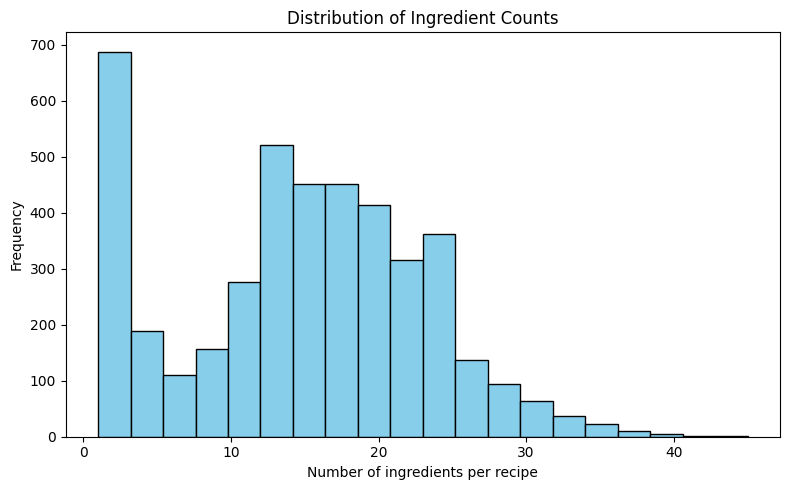


🧂 Number of ingredients that appear only once: 32

📈 Recipe with Most Ingredients:
['gobi', 'pepper', 'mint', 'chilli', 'carrot', 'puree', 'milk', 'bay', 'spice', 'rice', 'cumin', 'biryani', 'tomatoes', 'garlic', 'lentil', 'water', 'cauliflower', 'patta', 'vegetable', 'ginger', 'elaichi', 'pea', 'onion', 'cinnamon', 'ghee', 'tej', 'jeera', 'clove', 'salt', 'ajwain', 'spinach', 'cardamom', 'almond', 'potato', 'oil', 'badam', 'capsicum', 'saffron', 'bean', 'sugar', 'turmeric', 'coriander', 'seed', 'paste', 'soya']

📉 Recipe with Fewest Ingredients:
['oil']


In [79]:
import matplotlib.pyplot as plt
from collections import Counter

# 1. Safely add ingredient count column
df.loc[:, 'ingredient_count'] = df['cleaned_ingredients3'].apply(len)

# 2. Basic statistics of ingredient count
print("📊 Ingredient Count Stats:")
print(df['ingredient_count'].describe())

# 3. Most common number of ingredients
print("\n🔢 Most Common Ingredient List Sizes:")
print(df['ingredient_count'].value_counts().head(10))

# 4. Most common ingredients overall
all_tokens = [token for sublist in df['cleaned_ingredients3'] for token in sublist]
token_counts = Counter(all_tokens)
print("\n🥇 Top 10 Most Common Ingredients:")
for token, count in token_counts.most_common(10):
    print(f"{token}: {count}")

# 5. Histogram of ingredient counts per recipe
plt.figure(figsize=(8, 5))
df['ingredient_count'].hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of ingredients per recipe')
plt.ylabel('Frequency')
plt.title('Distribution of Ingredient Counts')
plt.grid(False)
plt.tight_layout()
plt.show()

# 6. Rare ingredients (appear only once)
rare_ingredients = [token for token, count in token_counts.items() if count == 1]
print(f"\n🧂 Number of ingredients that appear only once: {len(rare_ingredients)}")

# 7. Recipes with most and fewest ingredients
max_row = df.loc[df['ingredient_count'].idxmax()]
min_row = df.loc[df['ingredient_count'].idxmin()]

print("\n📈 Recipe with Most Ingredients:")
print(max_row['cleaned_ingredients3'])

print("\n📉 Recipe with Fewest Ingredients:")
print(min_row['cleaned_ingredients3'])


# Model Building

In [80]:
df['cleaned_ingredients3']

0                                                                                                                                                      [pepper, salt, curd, coconut, cumin, ghee, seed, jeera, herb, yogurt]
1                                                                                                  [salt, vegetable, chilli, curd, ginger, onion, spice, coriander, cumin, oil, fish, garlic, paste, jeera, yogurt, chicken]
2                                                                                                                         [pepper, salt, vegetable, chilli, gram, ginger, spice, coriander, turmeric, tomato, oil, capsicum]
3       [pepper, chilli, til, spice, tomatoes, garlic, herb, ginger, sesame, eggplant, onion, coconut, baingan, salt, gram, mustard, tamarind, pickle, oil, brinjal, moong, peanut, turmeric, coriander, curry, seed, paste]
4                                [chilli, til, asafoetida, spice, dal, cumin, jaggery, methi, water, mango, sesame, 

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4311 entries, 0 to 4465
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  4311 non-null   object
 1   image_url             4311 non-null   object
 2   description           4311 non-null   object
 3   cuisine               4305 non-null   object
 4   course                4272 non-null   object
 5   diet                  4274 non-null   object
 6   prep_time             4301 non-null   object
 7   ingredients           4311 non-null   object
 8   instructions          4311 non-null   object
 9   image_available       4311 non-null   int64 
 10  cleaned_ingredients   4311 non-null   object
 11  cleaned_ingredients1  4311 non-null   object
 12  cleaned_ingredients2  4311 non-null   object
 13  cleaned_ingredients3  4311 non-null   object
 14  ingredient_count      4311 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 667.9

In [82]:
df1 = df.copy()

In [83]:
count = df1[df1['ingredient_count'] < 10].shape[0]
print("Number of rows with less than 10 ingredients:", count)


Number of rows with less than 10 ingredients: 1145


In [84]:
df1 = df1[df1['ingredient_count'] >= 10]
print("Remaining rows after filtering:", df1.shape)

Remaining rows after filtering: (3166, 15)


In [85]:
import pandas as pd
import networkx as nx
from typing import List, Tuple, Optional

# Standardize ingredients by converting to lowercase
def standardize_ingredients(ingredients: List[str]) -> List[str]:
    return [ing.lower() for ing in ingredients]

# Preprocess df1['cleaned_ingredients3'] to standardize ingredients
df1['cleaned_ingredients3'] = df1['cleaned_ingredients3'].apply(standardize_ingredients)

# Initialize knowledge graph
G = nx.Graph()

# Add nodes and edges to the graph
for idx, row in df1.iterrows():
    dish = row['name']
    ingredients = row['cleaned_ingredients3']
    G.add_node(dish, type='dish')
    for ing in ingredients:
        G.add_node(ing, type='ingredient')
        G.add_edge(dish, ing, type='used_in')

# Function to recommend dish based on user ingredients
def recommend_dish(user_ingredients: List[str], top_n: int = 1) -> List[Tuple[Optional[str], List[str], float]]:
    # Standardize user input
    user_ingredients = standardize_ingredients(user_ingredients)
    user_ings_set = set(user_ingredients)
    scores = []
    
    # Score each dish
    for dish in [n for n, d in G.nodes(data=True) if d['type'] == 'dish']:
        dish_ings = [n for n in G.neighbors(dish) if G.nodes[n]['type'] == 'ingredient']
        dish_ings_set = set(dish_ings)
        intersection = user_ings_set & dish_ings_set
        union = user_ings_set | dish_ings_set
        if intersection:  # Only consider dishes with at least one match
            jaccard = len(intersection) / len(union) if union else 0
            # Store dish, matching ingredients, and score
            scores.append((dish, list(intersection), jaccard))
    
    # Sort by Jaccard score, then by number of ingredients (favor fewer for ties)
    scores.sort(key=lambda x: (x[2], -len([n for n in G.neighbors(x[0]) if G.nodes[n]['type'] == 'ingredient'])), reverse=True)
    
    # Return top_n results with debugging info
    if not scores:
        print("No matching dishes found for input:", user_ingredients)
        return [(None, [], 0.0)]
    for dish, matches, score in scores[:top_n]:
        print(f"Dish: {dish}, Matches: {matches}, Jaccard Score: {score:.3f}")
    return scores[:top_n]

# Example usage
# user_input = ['cauliflower', 'turmeric', 'ghee']  # Replace with your test ingredients
# results = recommend_dish(user_input)
# print("Top recommended dish:", results[0][0] if results[0][0] else "None")

# Testing

In [86]:
# Example usage
user_input = ['cauliflower', 'turmeric', 'ghee']  # Replace with your test ingredients
results = recommend_dish(user_input)
print("Top recommended dish:", results[0][0] if results[0][0] else "None")

Dish: Aloo Gobi Sabzi Recipe - Potato And Cauliflower Dry Curry, Matches: ['cauliflower', 'ghee', 'turmeric'], Jaccard Score: 0.188
Top recommended dish: Aloo Gobi Sabzi Recipe - Potato And Cauliflower Dry Curry


In [87]:
user_input = ['seed', 'curd', 'cumin', 'herb', 'ghee', 'pepper' , 'yogurt', 'salt', 'coconut', 'jeera']
results = recommend_dish(user_input)
print("Top recommended dish:", results[0][0] if results[0][0] else "None")



Dish: Doddapatre Tambuli Recipe (Karpooravalli Thayir Pachadi), Matches: ['salt', 'pepper', 'curd', 'coconut', 'cumin', 'ghee', 'seed', 'jeera', 'herb', 'yogurt'], Jaccard Score: 1.000
Top recommended dish: Doddapatre Tambuli Recipe (Karpooravalli Thayir Pachadi)


# Save model

In [88]:
# Save the original DataFrame
df.to_csv('df.csv', index=False)

# Save the filtered DataFrame
df1.to_csv('df1.csv', index=False)


In [89]:
df1

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions,image_available,cleaned_ingredients,cleaned_ingredients1,cleaned_ingredients2,cleaned_ingredients3,ingredient_count
0,Doddapatre Tambuli Recipe (Karpooravalli Thayir Pachadi),https://www.archanaskitchen.com/images/archanaskitchen/Indian_Raitas/Doddapatre_Tambuli_Recipe_Karuveppilai_Thayir_Pachadi-1.jpg,"Doddapatre Tambuli Recipe is a popular healing, nourishing cold yoghurt curry from Karnataka. Doddapatre, also known as Big Thyme in English, Ajwain leaves in Hindi, Karpooravalli in Tamil, Owa in Marathi and Pani Koorka in Malayalam - is known to have a lot of medicinal values. It has a very distinct smell and flavour to it, which resembles camphor and is known to improve digestion, relieve chest congestion and have overall good health benefits. It also reduces skin related issues when crushed and the juice applied on sensitive areas. Tambuli is a cold yoghurt curry made by grinding a herb, vegetable or spice with coconut and a handful of spices. Sometimes it is also given a tempering which enhances the flavours. Serve this Doddapatre Tambuli along with hot Steamed Rice and ghee as the first course during a South Indian lunch or dinner.",Indian,Side Dish,Vegetarian,Total in 30 M,"\n\n\t\t\t\t\t\t\t \t\t4 cups Indian borage (Doddapatre)\t\t\t\t\t\t\t \t\t, cleaned and washed\t\t\t\t\t\t\t \t\n\n\t\t\t\t\t\t\t \t\t1/2 cup Curd (Dahi / Yogurt) \n\n\t\t\t\t\t\t\t \t\t1 tablespoon Cumin seeds (Jeera) \n\n\t\t\t\t\t\t\t \t\t1/2 teaspoon Whole Black Peppercorns \n\n\t\t\t\t\t\t\t \t\t1/4 cup Dessicated Coconut \n\nSalt\t\t\t\t\t\t\t \t\t, to taste\t\t\t\t\t\t\t \t\n\n\t\t\t\t\t\t\t \t\t2 tablespoons Ghee \n","To begin making the Doddapatre Tambuli, first thoroughly wash the doddapatre leaves and wipe them dry between kitchen towels.Then place a kadai on the heat. Heat a tablespoon of ghee in it, and add the doddapatre leaves to the ghee. Sauce them gently on a medium heat until they change colour and sweat. continue to saute until all the water they release has evaporated. The leaves will change colour and reduce to half the quantity.Take them out of the kadai and transfer them into a mixer and set the jar aside.In the same kadai, dry roast jeera and black pepper corns till the jeera turns dark in colour and aromatic. Add these roasted spices also into the mixer jar.Add coconut, salt to the mixer too and grind it using half the quantity of yogurt, until it is a smooth paste.Transfer the paste into a serving bowl. Top it up with the remaining yogurt and whisk until it is smoothly combined.Place a tadka ladle on the heat and melt some ghee in it. When the ghee is warm, add the cumin seeds, allow them crackle, and pour the tempering over the tambuli.Mix well and serve child along with Steamed Rice.",1,cups Indian borage Doddapatre cleaned and washed cup Curd Dahi Yogurt tablespoon Cumin seeds Jeera teaspoon Whole Black Peppercorns cup Dessicated Coconut Salt to taste tablespoons Ghee,cups indian herb doddapatre cleaned and washed cup curd curd yogurt tablespoon cumin seed jeera teaspoon whole black pepper cup dessicated coconut salt to taste tablespoons ghee,herb curd curd yogurt cumin seed jeera pepper coconut salt ghee,"[pepper, salt, curd, coconut, cumin, ghee, seed, jeera, herb, yogurt]",10
1,Fish Tandoori Recipe,https://www.archanaskitchen.com/images/archanaskitchen/1-Author/poojanadkarni/Fish_Tandoori.jpg,"Have you ever tried out fish tandoori? Trust me, it is equally as delicious as chicken tandoori. Normally, tandoori is prepared in tandoor oven, but I normally prepare it in my convection oven. The fish choice is completely upto you. Same recipe can be used for fillets too. I normally use pompano or kingfish for this recipe.",North Indian Recipes,Appetizer,High Protein Non Vegetarian,Total in 80 M,"\n\n\t\t\t\t\t\t\t \t\t1 Fish\t\t\t\t\t\t\t \t\t, nicely washed with bones on (I used Pompano)\t\t\t\t\t\t\t \t\nFor marination\n\n\t\t\t\t\t\t\t \t\t2

# Get Unique Tokens

In [90]:
# Flatten all lists and convert to a set to get unique ingredients
final_tokens_used = list(set(ing for sublist in df1['cleaned_ingredients3'] for ing in sublist))

# Optional: sort alphabetically
final_tokens_used.sort()

# Print how many unique ingredients found
print(f"Total unique ingredients: {len(final_tokens_used)}")

Total unique ingredients: 259


In [91]:
final_tokens_used

['agathi',
 'ajwain',
 'almond',
 'almondscashews',
 'amchur',
 'amla',
 'anise',
 'apple',
 'apricots',
 'asafoetida',
 'atta',
 'avocado',
 'badam',
 'baingan',
 'bamboo',
 'banana',
 'barley',
 'basil',
 'basundi',
 'bay',
 'bean',
 'beans',
 'beetroot',
 'ber',
 'berry',
 'besan',
 'betel',
 'bhakri',
 'bhujia',
 'bhurji',
 'biryani',
 'biscuit',
 'boondi',
 'bran',
 'bread',
 'brinjal',
 'broccoli',
 'brussel',
 'buckwheat',
 'butter',
 'buttermilk',
 'butternut',
 'cabbage',
 'cake',
 'caldine',
 'camphor',
 'candy',
 'cane',
 'capsicum',
 'cardamom',
 'carrot',
 'cashew',
 'cauliflower',
 'chana',
 'cheela',
 'cheese',
 'chenna',
 'cherry',
 'chestnut',
 'chicken',
 'chickpea',
 'chilli',
 'chocolate',
 'chole',
 'chutney',
 'cinnamon',
 'citron',
 'clove',
 'cocoa',
 'coconut',
 'coffee',
 'coriander',
 'corn',
 'cornflour',
 'cream',
 'crop',
 'cucumber',
 'cumin',
 'curd',
 'curry',
 'custard',
 'dal',
 'dalia',
 'date',
 'dosa',
 'dough',
 'drumstick',
 'egg',
 'eggplant',
 

In [92]:
# almondscashews -> almond,cashew,almondcashews
# almond -> almondcashews
#cashew -> almondcashew
# badam -> badam, almond
# brinjal -> baingan , brinjal
# baingan -> brinjal ,baingan
# bean -> bean, beans
# beans -> bean, beans
# gobi -> cabbage , gobi
# grape -> grapes, grape
# grapes -> grape, grapes
# shrimp -> shrimps, shrimp
# shrimps -> shrimp, shrimps
# tomato -> tomatoes. tomato
# tomatoes -> tomato, tomatoes
# vegetable -> vegetable ,  vegetables, veggies
# vegetables -> vegetable, vegetables, veggies
# veggies -> vegetable, vegetables, veggies
# walnut -> walnuts, walnut
# walnuts -> walnuts, walnut

# Replace Entries in list

In [93]:
df1 = pd.read_csv('df1.csv')

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3166 entries, 0 to 3165
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  3166 non-null   object
 1   image_url             3166 non-null   object
 2   description           3166 non-null   object
 3   cuisine               3162 non-null   object
 4   course                3137 non-null   object
 5   diet                  3139 non-null   object
 6   prep_time             3160 non-null   object
 7   ingredients           3166 non-null   object
 8   instructions          3166 non-null   object
 9   image_available       3166 non-null   int64 
 10  cleaned_ingredients   3166 non-null   object
 11  cleaned_ingredients1  3166 non-null   object
 12  cleaned_ingredients2  3166 non-null   object
 13  cleaned_ingredients3  3166 non-null   object
 14  ingredient_count      3166 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 

In [95]:
import ast

def parse_list_of_strings(x):
    if isinstance(x, list):
        return [str(item) for item in x]
    elif isinstance(x, str):
        try:
            evaluated = ast.literal_eval(x)
            if isinstance(evaluated, list):
                return [str(item) for item in evaluated]
            else:
                return [str(x)]
        except:
            return [str(x)]
    else:
        return []

df1['cleaned_ingredients3'] = df1['cleaned_ingredients3'].apply(parse_list_of_strings)

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3166 entries, 0 to 3165
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  3166 non-null   object
 1   image_url             3166 non-null   object
 2   description           3166 non-null   object
 3   cuisine               3162 non-null   object
 4   course                3137 non-null   object
 5   diet                  3139 non-null   object
 6   prep_time             3160 non-null   object
 7   ingredients           3166 non-null   object
 8   instructions          3166 non-null   object
 9   image_available       3166 non-null   int64 
 10  cleaned_ingredients   3166 non-null   object
 11  cleaned_ingredients1  3166 non-null   object
 12  cleaned_ingredients2  3166 non-null   object
 13  cleaned_ingredients3  3166 non-null   object
 14  ingredient_count      3166 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 

In [97]:
print(df1['cleaned_ingredients3'].iloc[0])  # should show a proper list of strings

['pepper', 'salt', 'curd', 'coconut', 'cumin', 'ghee', 'seed', 'jeera', 'herb', 'yogurt']


In [98]:
from collections import Counter

# Flatten the list of lists into one long list
all_ingredients = [ingredient for sublist in df1['cleaned_ingredients3'] for ingredient in sublist]

# Count occurrences of each ingredient
ingredient_counts = Counter(all_ingredients)

# Convert to a sorted DataFrame (optional)
ingredient_counts_df = pd.DataFrame(ingredient_counts.items(), columns=['ingredient', 'count'])
ingredient_counts_df = ingredient_counts_df.sort_values(by='count', ascending=False).reset_index(drop=True)

# Display top 10 ingredients
print(ingredient_counts_df.head(10))

  ingredient  count
0       salt   2723
1      spice   2638
2     chilli   2621
3       seed   2239
4        oil   2211
5   turmeric   1782
6  vegetable   1765
7  coriander   1680
8      jeera   1505
9      cumin   1493


In [99]:
ingredient_counts_df.shape

(259, 2)

In [100]:
df1['cleaned_ingredients3'] = df1['cleaned_ingredients3'].apply(
    lambda ingredients: ['walnut' if item == 'walnuts' else item for item in ingredients]
)

In [101]:
from collections import Counter

# Flatten the list of lists into one long list
all_ingredients = [ingredient for sublist in df1['cleaned_ingredients3'] for ingredient in sublist]

# Count occurrences of each ingredient
ingredient_counts = Counter(all_ingredients)

# Convert to a sorted DataFrame (optional)
ingredient_counts_df = pd.DataFrame(ingredient_counts.items(), columns=['ingredient', 'count'])
ingredient_counts_df = ingredient_counts_df.sort_values(by='count', ascending=False).reset_index(drop=True)

# Display top 10 ingredients
print(ingredient_counts_df.head(10))

  ingredient  count
0       salt   2723
1      spice   2638
2     chilli   2621
3       seed   2239
4        oil   2211
5   turmeric   1782
6  vegetable   1765
7  coriander   1680
8      jeera   1505
9      cumin   1493


In [102]:
ingredient_counts_df.shape

(258, 2)

In [103]:
df1['cleaned_ingredients3'] = df1['cleaned_ingredients3'].apply(
    lambda ingredients: [
        'vegetable' if item in ['veggies', 'vegetables'] else item
        for item in ingredients
    ]
)

In [104]:
df1['cleaned_ingredients3'] = df1['cleaned_ingredients3'].apply(
    lambda ingredients: ['tomato' if item == 'tomatoes' else item for item in ingredients]
)

In [105]:
df1['cleaned_ingredients3'] = df1['cleaned_ingredients3'].apply(
    lambda ingredients: ['shrimp' if item == 'shrimps' else item for item in ingredients]
)

In [106]:
df1['cleaned_ingredients3'] = df1['cleaned_ingredients3'].apply(
    lambda ingredients: ['grape' if item == 'grapes' else item for item in ingredients]
)

In [107]:
df1['cleaned_ingredients3'] = df1['cleaned_ingredients3'].apply(
    lambda ingredients: ['cabbage' if item == 'gobi' else item for item in ingredients]
)

In [108]:
df1['cleaned_ingredients3'] = df1['cleaned_ingredients3'].apply(
    lambda ingredients: ['bean' if item == 'beans' else item for item in ingredients]
)

In [109]:
df1['cleaned_ingredients3'] = df1['cleaned_ingredients3'].apply(
    lambda ingredients: ['brinjal' if item == 'baingan' else item for item in ingredients]
)

In [110]:
df1['cleaned_ingredients3'] = df1['cleaned_ingredients3'].apply(
    lambda ingredients: [
        'almond' if item == 'almondscashews' else
        'cashew' if item == 'cashewonlytemp' else  # just in case you want to split more later
        item
        for item in ingredients
        for item in (['almond', 'cashew'] if item == 'almondscashews' else [item])
    ]
)

In [111]:
from collections import Counter

# Flatten the list of lists into one long list
all_ingredients = [ingredient for sublist in df1['cleaned_ingredients3'] for ingredient in sublist]

# Count occurrences of each ingredient
ingredient_counts = Counter(all_ingredients)

# Convert to a sorted DataFrame (optional)
ingredient_counts_df = pd.DataFrame(ingredient_counts.items(), columns=['ingredient', 'count'])
ingredient_counts_df = ingredient_counts_df.sort_values(by='count', ascending=False).reset_index(drop=True)

# Display top 10 ingredients
print(ingredient_counts_df.head(10))

  ingredient  count
0       salt   2723
1      spice   2638
2     chilli   2621
3       seed   2239
4        oil   2211
5  vegetable   1795
6   turmeric   1782
7  coriander   1680
8      jeera   1505
9      cumin   1493


In [112]:
ingredient_counts_df.shape

(249, 2)

In [113]:
ingredient_counts_df = ingredient_counts_df.sort_values(by='ingredient').reset_index(drop=True)

In [114]:
# Temporarily expand display settings
with pd.option_context('display.max_rows', 250, 'display.max_colwidth', None):
    print(ingredient_counts_df.head(250))

       ingredient  count
0          agathi      1
1          ajwain    170
2          almond    174
3          amchur    156
4            amla     15
5           anise     71
6           apple     20
7        apricots      1
8      asafoetida    787
9            atta     20
10        avocado      5
11          badam    152
12         bamboo      2
13         banana     88
14         barley      6
15          basil     10
16        basundi      1
17            bay    433
18           bean    236
19       beetroot     39
20            ber      1
21          berry     18
22          besan    201
23          betel      5
24         bhakri      1
25         bhujia      1
26         bhurji      2
27        biryani     17
28        biscuit      4
29         boondi      8
30           bran      3
31          bread     81
32        brinjal    241
33       broccoli     24
34        brussel      2
35      buckwheat      4
36         butter    122
37     buttermilk     30
38      butternut      1


In [115]:
df1['ingredient_count'] = df1['cleaned_ingredients3'].apply(len)

In [116]:
rows_less_than_10 = (df1['ingredient_count'] < 10).sum()
print(f"Number of rows with less than 10 ingredients: {rows_less_than_10}")

Number of rows with less than 10 ingredients: 0


# Model Building

In [117]:
import pandas as pd
import networkx as nx
from typing import List, Tuple, Optional

# Standardize ingredients by converting to lowercase
def standardize_ingredients(ingredients: List[str]) -> List[str]:
    return [ing.lower() for ing in ingredients]

# Preprocess df1['cleaned_ingredients3'] to standardize ingredients
df1['cleaned_ingredients3'] = df1['cleaned_ingredients3'].apply(standardize_ingredients)

# Initialize knowledge graph
G = nx.Graph()

# Add nodes and edges to the graph
for idx, row in df1.iterrows():
    dish = row['name']
    ingredients = row['cleaned_ingredients3']
    G.add_node(dish, type='dish')
    for ing in ingredients:
        G.add_node(ing, type='ingredient')
        G.add_edge(dish, ing, type='used_in')

# Function to recommend dish based on user ingredients
def recommend_dish(user_ingredients: List[str], top_n: int = 1) -> List[Tuple[Optional[str], List[str], float]]:
    # Standardize user input
    user_ingredients = standardize_ingredients(user_ingredients)
    user_ings_set = set(user_ingredients)
    scores = []
    
    # Score each dish
    for dish in [n for n, d in G.nodes(data=True) if d['type'] == 'dish']:
        dish_ings = [n for n in G.neighbors(dish) if G.nodes[n]['type'] == 'ingredient']
        dish_ings_set = set(dish_ings)
        intersection = user_ings_set & dish_ings_set
        union = user_ings_set | dish_ings_set
        if intersection:  # Only consider dishes with at least one match
            jaccard = len(intersection) / len(union) if union else 0
            # Store dish, matching ingredients, and score
            scores.append((dish, list(intersection), jaccard))
    
    # Sort by Jaccard score, then by number of ingredients (favor fewer for ties)
    scores.sort(key=lambda x: (x[2], -len([n for n in G.neighbors(x[0]) if G.nodes[n]['type'] == 'ingredient'])), reverse=True)
    
    # Return top_n results with debugging info
    if not scores:
        print("No matching dishes found for input:", user_ingredients)
        return [(None, [], 0.0)]
    for dish, matches, score in scores[:top_n]:
        print(f"Dish: {dish}, Matches: {matches}, Jaccard Score: {score:.3f}")
    return scores[:top_n]

# Example usage
# user_input = ['cauliflower', 'turmeric', 'ghee']  # Replace with your test ingredients
# results = recommend_dish(user_input)
# print("Top recommended dish:", results[0][0] if results[0][0] else "None")

In [131]:
df1.to_csv("cleaned_dish_data.csv", index=False)


In [133]:
import pickle

with open("dish_ingredient_graph.gpickle", "wb") as f:
    pickle.dump(G, f)


# Testing

In [134]:
import pickle
import networkx as nx
from typing import List, Tuple, Optional

# 1. Load the saved graph from file
with open("dish_ingredient_graph.gpickle", "rb") as f:
    G = pickle.load(f)

# 2. Utility function to clean input
def standardize_ingredients(ingredients: List[str]) -> List[str]:
    return [ing.lower() for ing in ingredients]

# 3. Recommendation function
def recommend_dish(user_ingredients: List[str], top_n: int = 1) -> List[Tuple[Optional[str], List[str], float]]:
    user_ingredients = standardize_ingredients(user_ingredients)
    user_ings_set = set(user_ingredients)
    scores = []

    for dish in [n for n, d in G.nodes(data=True) if d['type'] == 'dish']:
        dish_ings = [n for n in G.neighbors(dish) if G.nodes[n]['type'] == 'ingredient']
        dish_ings_set = set(dish_ings)
        intersection = user_ings_set & dish_ings_set
        union = user_ings_set | dish_ings_set
        if intersection:
            jaccard = len(intersection) / len(union)
            scores.append((dish, list(intersection), jaccard))

    scores.sort(key=lambda x: (x[2], -len([n for n in G.neighbors(x[0]) if G.nodes[n]['type'] == 'ingredient'])), reverse=True)

    if not scores:
        print("No matching dishes found for input:", user_ingredients)
        return [(None, [], 0.0)]

    for dish, matches, score in scores[:top_n]:
        print(f"Dish: {dish}, Matches: {matches}, Jaccard Score: {score:.3f}")
    return scores[:top_n]

# 4. Example prediction
user_input = ['cauliflower', 'turmeric', 'ghee']
results = recommend_dish(user_input)
print("Top recommended dish:", results[0][0] if results[0][0] else "None")


Dish: Aloo Gobi Sabzi Recipe - Potato And Cauliflower Dry Curry, Matches: ['cauliflower', 'ghee', 'turmeric'], Jaccard Score: 0.188
Top recommended dish: Aloo Gobi Sabzi Recipe - Potato And Cauliflower Dry Curry


# Final Test

In [2]:
pip install fuzzywuzzy


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.



Evaluation Metrics Across 100 Dishes:
Average Jaccard Similarity: 0.2909
Average Fuzzy Accuracy: 0.3095
Average Word Matching Accuracy: 0.3929

Predicted Dishes for All 100 Entries:
| Original Dish     | Predicted Dish 1                                                                      | Predicted Dish 2                                                                      | Predicted Dish 3                                                              |
|:------------------|:--------------------------------------------------------------------------------------|:--------------------------------------------------------------------------------------|:------------------------------------------------------------------------------|
| Aloo Gobi         | Aloo Gobi Sabzi Recipe - Spicy Potato Cauliflower Sabzi                               | Hariyali Dum Aloo Recipe - Potatoes In Spinach Mint Curry                             | Rajasthani Kande Ki Sabzi Recipe - Onion Sabzi                 

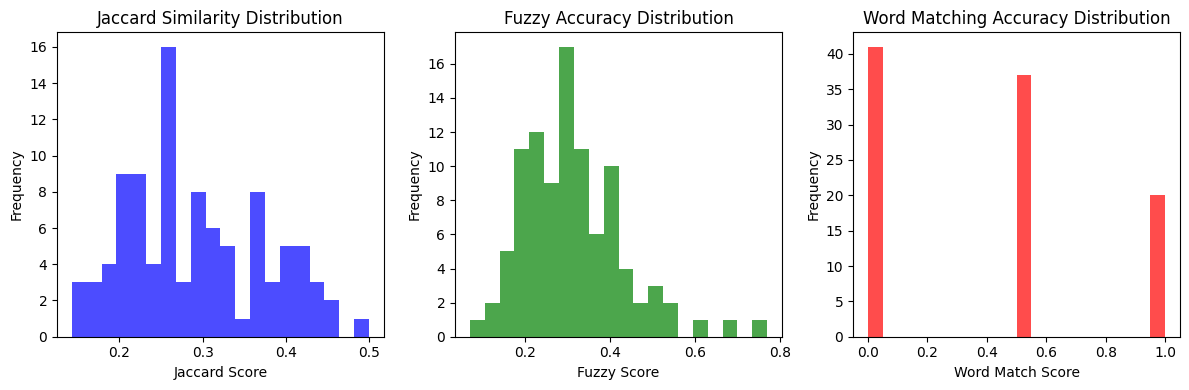

In [10]:
import pickle
import networkx as nx
from typing import List, Tuple, Optional
from fuzzywuzzy import fuzz
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved graph
with open("dish_ingredient_graph.gpickle", "rb") as f:
    G = pickle.load(f)

# Utility function to clean input
def standardize_ingredients(ingredients: List[str]) -> List[str]:
    return [ing.lower().strip() for ing in ingredients]

# Recommendation function to return top 3 dishes
def recommend_dish(user_ingredients: List[str], top_n: int = 3) -> List[Tuple[Optional[str], List[str], float]]:
    user_ingredients = standardize_ingredients(user_ingredients)
    user_ings_set = set(user_ingredients)
    scores = []

    for dish in [n for n, d in G.nodes(data=True) if d['type'] == 'dish']:
        dish_ings = [n for n in G.neighbors(dish) if G.nodes[n]['type'] == 'ingredient']
        dish_ings_set = set(dish_ings)
        intersection = user_ings_set & dish_ings_set
        union = user_ings_set | dish_ings_set
        if intersection:
            jaccard = len(intersection) / len(union)
            scores.append((dish, list(intersection), jaccard))

    scores.sort(key=lambda x: (x[2], -len([n for n in G.neighbors(x[0]) if G.nodes[n]['type'] == 'ingredient'])), reverse=True)

    if not scores:
        return [(None, [], 0.0)] * top_n

    return scores[:top_n]

# Word matching accuracy function
def word_matching_accuracy(pred_name: str, true_name: str) -> float:
    if pred_name is None:
        return 0.0
    pred_words = set(re.findall(r'\w+', pred_name.lower()))
    true_words = set(re.findall(r'\w+', true_name.lower()))
    if not true_words:
        return 0.0
    return len(pred_words.intersection(true_words)) / len(true_words)

# Evaluation function
def evaluate_model(dishes: List[dict]) -> Tuple[List[float], List[float], List[float], pd.DataFrame]:
    jaccard_scores = []
    fuzzy_scores = []
    word_match_scores = []
    results_data = []

    for dish in dishes:
        true_name = dish['name']
        ingredients = dish['ingredients']
        results = recommend_dish(ingredients, top_n=3)

        # Store prediction details
        pred_dishes = [pred_name if pred_name else "None" for pred_name, _, _ in results]
        results_data.append({
            "Original Dish": true_name,
            "Predicted Dish 1": pred_dishes[0],
            "Predicted Dish 2": pred_dishes[1],
            "Predicted Dish 3": pred_dishes[2]
        })

        # Compute metrics for the top 3 predictions
        best_jaccard = max([score for _, _, score in results], default=0.0)
        best_fuzzy = max([fuzz.ratio(true_name.lower(), pred_name.lower()) / 100 if pred_name else 0.0 for pred_name, _, _ in results])
        best_word_match = max([word_matching_accuracy(pred_name, true_name) if pred_name else 0.0 for pred_name, _, _ in results])

        jaccard_scores.append(best_jaccard)
        fuzzy_scores.append(best_fuzzy)
        word_match_scores.append(best_word_match)

    # Create DataFrame for results
    results_df = pd.DataFrame(results_data)

    return jaccard_scores, fuzzy_scores, word_match_scores, results_df

# Plotting function
def plot_metrics(jaccard_scores: List[float], fuzzy_scores: List[float], word_match_scores: List[float]):
    plt.figure(figsize=(12, 4))

    # Jaccard Similarity Distribution
    plt.subplot(1, 3, 1)
    plt.hist(jaccard_scores, bins=20, color='blue', alpha=0.7)
    plt.title('Jaccard Similarity Distribution')
    plt.xlabel('Jaccard Score')
    plt.ylabel('Frequency')

    # Fuzzy Accuracy Distribution
    plt.subplot(1, 3, 2)
    plt.hist(fuzzy_scores, bins=20, color='green', alpha=0.7)
    plt.title('Fuzzy Accuracy Distribution')
    plt.xlabel('Fuzzy Score')
    plt.ylabel('Frequency')

    # Word Matching Accuracy Distribution
    plt.subplot(1, 3, 3)
    plt.hist(word_match_scores, bins=20, color='red', alpha=0.7)
    plt.title('Word Matching Accuracy Distribution')
    plt.xlabel('Word Match Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Dataset
dishes = [
    {"name": "Aloo Gobi", "ingredients": ["potato", "cauliflower", "turmeric", "cumin", "ghee", "onion", "garlic", "ginger"]},
    {"name": "Butter Chicken", "ingredients": ["chicken", "butter", "tomato", "cream", "garam masala", "turmeric", "ginger", "garlic"]},
    {"name": "Palak Paneer", "ingredients": ["spinach", "paneer", "onion", "tomato", "garlic", "ginger", "cumin", "turmeric"]},
    {"name": "Chole Masala", "ingredients": ["chickpeas", "onion", "tomato", "ginger", "garlic", "cumin", "coriander", "turmeric"]},
    {"name": "Naan", "ingredients": ["flour", "yeast", "ghee", "yogurt", "salt", "sugar"]},
    {"name": "Chicken Biryani", "ingredients": ["rice", "chicken", "saffron", "cardamom", "cloves", "onion", "ghee", "turmeric"]},
    {"name": "Samosa", "ingredients": ["flour", "potato", "peas", "cumin", "turmeric", "ghee", "chili"]},
    {"name": "Masala Dosa", "ingredients": ["rice", "urad dal", "salt", "ghee", "potato", "onion"]},
    {"name": "Rasgulla", "ingredients": ["milk", "sugar", "cardamom", "lemon"]},
    {"name": "Rogan Josh", "ingredients": ["lamb", "yogurt", "garlic", "ginger", "cardamom", "cloves", "turmeric", "chili"]},
    {"name": "Dal Tadka", "ingredients": ["lentils", "ghee", "cumin", "garlic", "onion", "tomato", "turmeric", "chili"]},
    {"name": "Pani Puri", "ingredients": ["flour", "semolina", "potato", "chickpeas", "tamarind", "cumin", "chili"]},
    {"name": "Tandoori Chicken", "ingredients": ["chicken", "yogurt", "turmeric", "garam masala", "ginger", "garlic", "chili"]},
    {"name": "Malai Kofta", "ingredients": ["paneer", "potato", "cream", "tomato", "cashew", "turmeric", "ginger"]},
    {"name": "Idli Sambar", "ingredients": ["rice", "urad dal", "salt", "ghee", "lentils", "tamarind"]},
    {"name": "Gulab Jamun", "ingredients": ["milk powder", "flour", "sugar", "ghee", "cardamom"]},
    {"name": "Vada Pav", "ingredients": ["flour", "potato", "chili", "cumin", "turmeric", "ghee"]},
    {"name": "Pav Bhaji", "ingredients": ["potato", "tomato", "peas", "butter", "onion", "garam masala", "chili"]},
    {"name": "Rice Kheer", "ingredients": ["rice", "milk", "sugar", "cardamom", "saffron", "nuts"]},
    {"name": "Matar Paneer", "ingredients": ["paneer", "peas", "tomato", "onion", "turmeric", "ginger", "garlic"]},
    {"name": "Aloo Paratha", "ingredients": ["flour", "potato", "ghee", "cumin", "chili"]},
    {"name": "Chicken Tikka", "ingredients": ["chicken", "yogurt", "turmeric", "cumin", "ginger", "garlic", "chili"]},
    {"name": "Baingan Bharta", "ingredients": ["eggplant", "onion", "tomato", "garlic", "ginger", "cumin", "turmeric"]},
    {"name": "Jalebi", "ingredients": ["flour", "sugar", "saffron", "ghee"]},
    {"name": "Veg Pulao", "ingredients": ["rice", "peas", "carrot", "cloves", "cardamom", "ghee", "cumin"]},
    {"name": "Bhindi Masala", "ingredients": ["okra", "onion", "tomato", "turmeric", "cumin", "chili"]},
    {"name": "Kadai Chicken", "ingredients": ["chicken", "tomato", "onion", "capsicum", "ginger", "garlic", "turmeric"]},
    {"name": "Sev Puri", "ingredients": ["flour", "potato", "onion", "tamarind", "chili", "sev"]},
    {"name": "Mango Lassi", "ingredients": ["yogurt", "mango", "sugar", "cardamom"]},
    {"name": "Dhokla", "ingredients": ["gram flour", "yogurt", "turmeric", "mustard seeds", "ghee"]},
    {"name": "Mutton Curry", "ingredients": ["mutton", "onion", "tomato", "ginger", "garlic", "turmeric", "cloves"]},
    {"name": "Poori", "ingredients": ["flour", "ghee", "salt"]},
    {"name": "Shahi Paneer", "ingredients": ["paneer", "cream", "tomato", "cashew", "turmeric", "cardamom"]},
    {"name": "Kachori", "ingredients": ["flour", "lentils", "ghee", "cumin", "chili"]},
    {"name": "Aloo Tikki", "ingredients": ["potato", "peas", "cumin", "chili", "ghee"]},
    {"name": "Fish Curry", "ingredients": ["fish", "coconut", "tomato", "turmeric", "ginger", "garlic", "chili"]},
    {"name": "Upma", "ingredients": ["semolina", "mustard seeds", "onion", "ghee", "chili"]},
    {"name": "Misal Pav", "ingredients": ["sprouts", "onion", "tomato", "chili", "ghee", "pav"]},
    {"name": "Milk Barfi", "ingredients": ["milk", "sugar", "ghee", "cardamom"]},
    {"name": "Vegetable Korma", "ingredients": ["carrot", "peas", "potato", "cream", "cashew", "turmeric"]},
    {"name": "Papdi Chaat", "ingredients": ["flour", "milk", "potato", "yogurt", "tamarind", "chili"]},
    {"name": "Plain Paratha", "ingredients": ["flour", "ghee", "salt"]},
    {"name": "Prawn Masala", "ingredients": ["prawns", "onion", "tomato", "turmeric", "ginger", "garlic", "chili"]},
    {"name": "Kulfi", "ingredients": ["milk", "sugar", "cardamom", "nuts"]},
    {"name": "Methi Thepla", "ingredients": ["flour", "fenugreek", "turmeric", "ghee", "yogurt"]},
    {"name": "Dum Aloo", "ingredients": ["potato", "yogurt", "tomato", "turmeric", "ginger", "garlic"]},
    {"name": "Khichdi", "ingredients": ["rice", "lentils", "ghee", "cumin", "turmeric"]},
    {"name": "Sooji Halwa", "ingredients": ["semolina", "ghee", "sugar", "cardamom", "nuts"]},
    {"name": "Kadhi Pakora", "ingredients": ["yogurt", "gram flour", "turmeric", "cumin", "chili"]},
    {"name": "Chicken Korma", "ingredients": ["chicken", "yogurt", "cream", "cashew", "turmeric", "ginger"]},
    {"name": "Pesarattu", "ingredients": ["moong dal", "rice", "ghee", "onion"]},
    {"name": "Bhel Puri", "ingredients": ["puffed rice", "onion", "tomato", "tamarind", "chili"]},
    {"name": "Gobi Manchurian", "ingredients": ["cauliflower", "soy sauce", "ginger", "garlic", "turmeric"]},
    {"name": "Paneer Tikka", "ingredients": ["paneer", "yogurt", "turmeric", "cumin", "ginger", "garlic"]},
    {"name": "Cucumber Raita", "ingredients": ["yogurt", "cucumber", "cumin", "salt"]},
    {"name": "Keema Curry", "ingredients": ["minced meat", "onion", "tomato", "ginger", "garlic", "turmeric"]},
    {"name": "Appam", "ingredients": ["rice", "coconut", "yeast", "sugar"]},
    {"name": "Modak", "ingredients": ["rice flour", "coconut", "jaggery", "cardamom"]},
    {"name": "Aloo Methi", "ingredients": ["potato", "fenugreek", "turmeric", "cumin", "ghee"]},
    {"name": "Chicken Chettinad", "ingredients": ["chicken", "coconut", "turmeric", "ginger", "garlic", "chili"]},
    {"name": "Pongal", "ingredients": ["rice", "moong dal", "ghee", "cashew", "pepper"]},
    {"name": "Sandesh", "ingredients": ["paneer", "sugar", "cardamom"]},
    {"name": "Laal Maas", "ingredients": ["mutton", "chili", "garlic", "ginger", "yogurt", "turmeric"]},
    {"name": "Vegetable Biryani", "ingredients": ["rice", "carrot", "peas", "cloves", "cardamom", "ghee"]},
    {"name": "Uttapam", "ingredients": ["rice", "urad dal", "onion", "tomato", "ghee"]},
    {"name": "Mysore Pak", "ingredients": ["gram flour", "ghee", "sugar"]},
    {"name": "Aloo Posto", "ingredients": ["potato", "poppy seeds", "turmeric", "chili", "ghee"]},
    {"name": "Shrikhand", "ingredients": ["yogurt", "sugar", "cardamom", "saffron"]},
    {"name": "Beetroot Poriyal", "ingredients": ["beetroot", "coconut", "mustard seeds", "chili"]},
    {"name": "Mushroom Masala", "ingredients": ["mushroom", "onion", "tomato", "turmeric", "ginger"]},
    {"name": "Pindi Chana", "ingredients": ["chickpeas", "tea leaves", "turmeric", "ginger", "garlic"]},
    {"name": "Saffron Kesari", "ingredients": ["semolina", "ghee", "sugar", "saffron", "nuts"]},
    {"name": "Chicken 65", "ingredients": ["chicken", "yogurt", "chili", "ginger", "garlic"]},
    {"name": "Avial", "ingredients": ["carrot", "beans", "coconut", "yogurt", "turmeric"]},
    {"name": "Prawn Biryani", "ingredients": ["prawns", "rice", "cloves", "cardamom", "ghee"]},
    {"name": "Phirni", "ingredients": ["rice", "milk", "sugar", "cardamom"]},
    {"name": "Rajma Masala", "ingredients": ["kidney beans", "onion", "tomato", "ginger", "garlic", "turmeric"]},
    {"name": "Batata Vada", "ingredients": ["potato", "gram flour", "chili", "turmeric", "ghee"]},
    {"name": "Khandvi", "ingredients": ["gram flour", "yogurt", "turmeric", "mustard seeds"]},
    {"name": "Mutton Biryani", "ingredients": ["mutton", "rice", "saffron", "cloves", "ghee"]},
    {"name": "Sambar", "ingredients": ["lentils", "tamarind", "tomato", "turmeric", "mustard seeds"]},
    {"name": "Puran Poli", "ingredients": ["flour", "lentils", "jaggery", "cardamom", "ghee"]},
    {"name": "Aloo Baingan", "ingredients": ["potato", "eggplant", "tomato", "turmeric", "cumin"]},
    {"name": "Chakli", "ingredients": ["rice flour", "gram flour", "ghee", "cumin"]},
    {"name": "Saag Aloo", "ingredients": ["spinach", "potato", "turmeric", "cumin", "ghee"]},
    {"name": "Kozhi Curry", "ingredients": ["chicken", "coconut", "turmeric", "ginger", "chili"]},
    {"name": "Besan Laddu", "ingredients": ["gram flour", "ghee", "sugar", "cardamom"]},
    {"name": "Vegetable Pulao", "ingredients": ["rice", "carrot", "peas", "cloves", "ghee"]},
    {"name": "Tomato Rasam", "ingredients": ["tamarind", "tomato", "lentils", "turmeric", "pepper"]},
    {"name": "Paneer Bhurji", "ingredients": ["paneer", "onion", "tomato", "turmeric", "chili"]},
    {"name": "Poha", "ingredients": ["flattened rice", "onion", "mustard seeds", "turmeric", "chili"]},
    {"name": "Amritsari Fish", "ingredients": ["fish", "gram flour", "chili", "turmeric", "ginger"]},
    {"name": "Chana Dal", "ingredients": ["chana dal", "onion", "tomato", "turmeric", "cumin"]},
    {"name": "Gajar Halwa", "ingredients": ["carrot", "milk", "sugar", "ghee", "cardamom"]},
    {"name": "Tindora Fry", "ingredients": ["tindora", "turmeric", "cumin", "chili", "ghee"]},
    {"name": "Bisi Bele Bath", "ingredients": ["rice", "lentils", "tamarind", "turmeric", "ghee"]},
    {"name": "Methi Paratha", "ingredients": ["flour", "fenugreek", "ghee", "turmeric"]},
    {"name": "Egg Curry", "ingredients": ["egg", "onion", "tomato", "turmeric", "ginger", "garlic"]}
]

# Run evaluation
jaccard_scores, fuzzy_scores, word_match_scores, results_df = evaluate_model(dishes)

# Print evaluation metrics
print("\nEvaluation Metrics Across 100 Dishes:")
print(f"Average Jaccard Similarity: {np.mean(jaccard_scores):.4f}")
print(f"Average Fuzzy Accuracy: {np.mean(fuzzy_scores):.4f}")
print(f"Average Word Matching Accuracy: {np.mean(word_match_scores):.4f}")

# Display results table
print("\nPredicted Dishes for All 100 Entries:")
print(results_df.to_markdown(index=False))

# Plot results
plot_metrics(jaccard_scores, fuzzy_scores, word_match_scores)

# Use existing models and display information

In [21]:
import pickle
import networkx as nx
import pandas as pd
from typing import List, Tuple, Optional

# Load the saved graph
with open("dish_ingredient_graph.gpickle", "rb") as f:
    G = pickle.load(f)

# Load the dataset
cosine_temp_df = pd.read_csv("df1.csv")

# Clean ingredient names by converting to lowercase and removing extra spaces
def standardize_ingredients(ingredients: List[str]) -> List[str]:
    return [ing.lower().strip() for ing in ingredients]

# Find top 3 dishes that match user ingredients
def recommend_dish(user_ingredients: List[str], top_n: int = 3) -> List[Tuple[Optional[str], List[str], float]]:
    user_ingredients = standardize_ingredients(user_ingredients)
    user_ings_set = set(user_ingredients)
    scores = []

    for dish in [n for n, d in G.nodes(data=True) if d['type'] == 'dish']:
        dish_ings = [n for n in G.neighbors(dish) if G.nodes[n]['type'] == 'ingredient']
        dish_ings_set = set(dish_ings)
        intersection = user_ings_set & dish_ings_set
        union = user_ings_set | dish_ings_set
        if intersection:
            jaccard = len(intersection) / len(union)
            scores.append((dish, list(intersection), jaccard))

    scores.sort(key=lambda x: (x[2], -len([n for n in G.neighbors(x[0]) if G.nodes[n]['type'] == 'ingredient'])), reverse=True)

    if not scores:
        return [(None, [], 0.0)] * top_n

    return scores[:top_n]

# Display details from the dataset for matching dishes
def display_dish_details(dish_names: List[Optional[str]], df: pd.DataFrame):
    matching_rows = df[df['name'].isin([name for name in dish_names if name is not None])]
    
    if matching_rows.empty:
        print("No matching dishes found in the dataset.")
        return
    
    for _, row in matching_rows.iterrows():
        print(f"\nDish: {row['name']}")
        print("-" * 50)
        print(f"Image URL: {row['image_url']}")
        print(f"Description: {row['description']}")
        print(f"Cuisine: {row['cuisine']}")
        print(f"Course: {row['course']}")
        print(f"Diet: {row['diet']}")
        print(f"Prep Time: {row['prep_time']}")
        print(f"Ingredients: {row['ingredients']}")
        print(f"Instructions: {row['instructions']}")
        print("-" * 50)

# Run recommendation and display details
user_input = ["cauliflower", "turmeric", "ghee"]
results = recommend_dish(user_input)
print("Top 3 Recommended Dishes:")
for dish, matches, score in results:
    print(f"Dish: {dish if dish else 'None'}, Matches: {matches}, Jaccard Score: {score:.3f}")

dish_names = [dish for dish, _, _ in results]
print("\nDetails from dataset for matching dishes:")
display_dish_details(dish_names, cosine_temp_df)

Top 3 Recommended Dishes:
Dish: Aloo Gobi Sabzi Recipe - Potato And Cauliflower Dry Curry, Matches: ['cauliflower', 'turmeric', 'ghee'], Jaccard Score: 0.188
Dish: Besan Ka Sheera Recipe (Natural Cold Remedy), Matches: ['turmeric', 'ghee'], Jaccard Score: 0.182
Dish: How to Make Homemade Jalebi Recipe, Matches: ['turmeric', 'ghee'], Jaccard Score: 0.167

Details from dataset for matching dishes:

Dish: How to Make Homemade Jalebi Recipe
--------------------------------------------------
Image URL: https://www.archanaskitchen.com/images/archanaskitchen/Indian_Sweets_Mithai/Homemade_Jalebi_Recipe-1-2.jpg
Description: The Homemade Jalebi Recipe is a delicious mithai dish that you can make right in your own kitchen. The Jalebi is a traditional sweet dish that is made on every festival, special occasions and monsoons. And so much so even homes make this dish to celebrate the occasion. This homemade Jalebi recipe is actually very easy to prepare and tastes absolutely delicious. Festivals lik